## import some library that we gonna use.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as pylab
from datetime import date, datetime,timedelta
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import  adfuller
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading data
df= pd.read_csv(r"C:\Users\mahmoud\Downloads\csv_files\Aquifer_Petrignano.csv", parse_dates=['Date'])
df.tail()

Date  Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
5218 2020-06-26                    0.0                    -25.68   
5219 2020-06-27                    0.0                    -25.80   
5220 2020-06-28                    0.0                    -25.80   
5221 2020-06-29                    0.0                    -25.78   
5222 2020-06-30                    0.0                    -25.91   

      Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  \
5218                    -25.07                      25.7   
5219                    -25.11                      26.2   
5220                    -25.19                      26.9   
5221                    -25.18                      26.9   
5222                    -25.25                      27.3   

      Temperature_Petrignano  Volume_C10_Petrignano  \
5218                    24.5             -29930.688   
5219                    25.0             -31332.960   
5220                    25.7             -32120.928   
5221                    26.0             -30602.880   
5222                    26.5             -31878.144   

      Hydrometry_Fiume_Chiascio_Petrignano  
5218                                   2.5  
5219                                   2.4  
5220                                   2.4  
5221                                   2.4  
5222                                   2.4

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  5223 non-null   datetime64[ns]
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64       
 2   Depth_to_Groundwater_P24              5168 non-null   float64       
 3   Depth_to_Groundwater_P25              5184 non-null   float64       
 4   Temperature_Bastia_Umbra              4199 non-null   float64       
 5   Temperature_Petrignano                4199 non-null   float64       
 6   Volume_C10_Petrignano                 5025 non-null   float64       
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 326.6 KB


In [4]:
# delete null
df= df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
df= df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  4199 non-null   datetime64[ns]
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64       
 2   Depth_to_Groundwater_P25              4172 non-null   float64       
 3   Temperature_Bastia_Umbra              4199 non-null   float64       
 4   Volume_C10_Petrignano                 4198 non-null   float64       
 5   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 197.0 KB


In [6]:
# ploting the data
df.columns= ['date', 'rainfall', 'Depth_to_Groundwater', 
             'Temperature', 'drainage_volume','river_hydrometry']
target= ['Depth_to_Groundwater']
feature= [col for col in df.columns if col not in target]

df.head()

date  rainfall  Depth_to_Groundwater  Temperature  drainage_volume  \
0 2009-01-01       0.0                -31.14          5.2       -24530.688   
1 2009-02-01       0.0                -31.11          2.3       -28785.888   
2 2009-03-01       0.0                -31.07          4.4       -25766.208   
3 2009-04-01       0.0                -31.05          0.8       -27919.296   
4 2009-05-01       0.0                -31.01         -1.9       -29854.656   

   river_hydrometry  
0               2.4  
1               2.5  
2               2.4  
3               2.4  
4               2.3

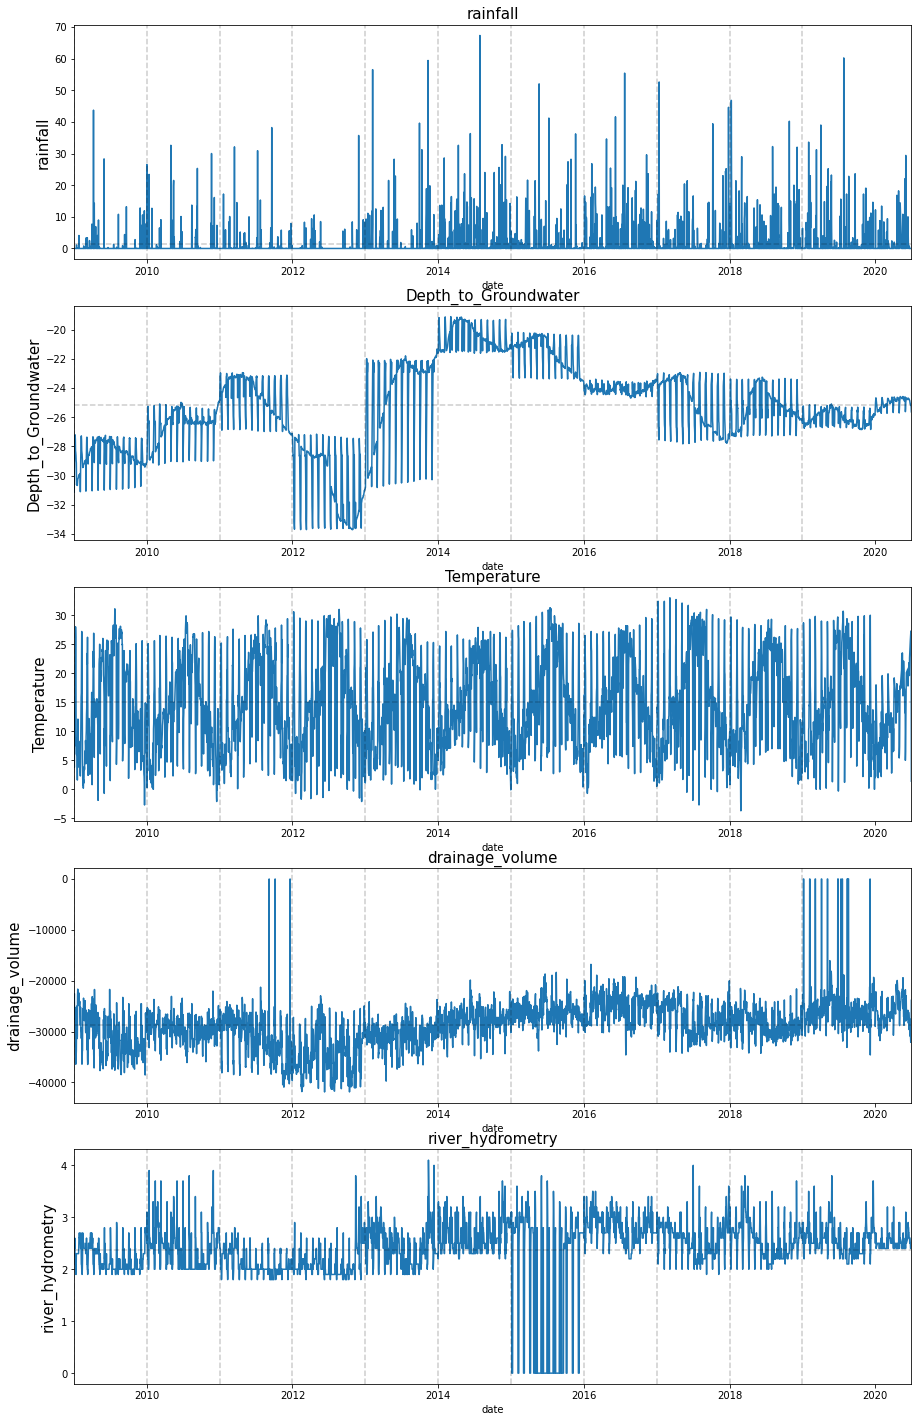

In [7]:
# ploting the data
rwo, ax= plt.subplots(nrows=5, ncols=1, figsize=(15,25))
for i,col in enumerate(df.columns[1:]):
    sns.lineplot(x=df['date'], y=df[col], ax= ax[i])
    ax[i].set_title(col, fontsize= 15)
    ax[i].set_ylabel(col, fontsize=15)
    ax[i].set_xlim([date(2009,1,1), date(2020,6,30)])
    ax[i].axhline(df[col].mean(), color='k', alpha=0.2, linestyle='--')
    for year in range(2009,2020):
             ax[i].axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [8]:
df= df.sort_values(by='date', ignore_index=True)
df.head()

date  rainfall  Depth_to_Groundwater  Temperature  drainage_volume  \
0 2009-01-01       0.0                -31.14          5.2       -24530.688   
1 2009-01-02       0.0                -29.74          3.8       -22536.576   
2 2009-01-03       0.0                -28.91          7.2       -26669.088   
3 2009-01-04       0.0                -28.03         13.6       -27028.512   
4 2009-01-05       0.0                -27.39         14.3       -27604.800   

   river_hydrometry  
0               2.4  
1               2.5  
2               2.4  
3               2.6  
4               2.3

In [9]:
df['delta']= df['date'] - df['date'].shift(1)

In [10]:
df[['date','delta']].head()

date  delta
0 2009-01-01    NaT
1 2009-01-02 1 days
2 2009-01-03 1 days
3 2009-01-04 1 days
4 2009-01-05 1 days

In [11]:
df['delta'].sum() , df['delta'].count()

(Timedelta('4357 days 00:00:00'), 4198)

In [12]:
index=[]
for i,n in enumerate(df['delta'] == '1 days'):
    if n == False :index.append(i) 
df.iloc[index]

date  rainfall  Depth_to_Groundwater  Temperature  drainage_volume  \
0    2009-01-01       0.0                -31.14          5.2       -24530.688   
4023 2020-01-13       0.0                -25.63          2.2       -25920.000   
4048 2020-02-13       0.0                -25.29          8.2       -27879.552   
4071 2020-03-13       0.0                -24.93         11.0       -26373.600   
4096 2020-04-13       0.0                -24.89         15.6       -26549.856   
4120 2020-05-13       0.0                -24.66         20.6       -22310.208   
4145 2020-06-13       0.0                -24.79         20.7       -27559.872   
4169 2020-08-01       0.0                -25.63          7.4       -24133.248   
4175 2020-09-01       0.0                -25.71          1.8       -27594.432   
4181 2020-10-01       0.0                -25.70          2.4       -26441.856   
4187 2020-11-01       0.0                -25.68          3.9       -25925.184   
4193 2020-12-01       0.0                -25.65          4.7       -25564.032   

      river_hydrometry   delta  
0                  2.4     NaT  
4023               2.5  7 days  
4048               2.4  7 days  
4071               2.7  7 days  
4096               2.5  7 days  
4120               2.5  7 days  
4145               2.6  7 days  
4169               2.5 26 days  
4175               2.5 26 days  
4181               2.5 25 days  
4187               2.5 26 days  
4193               2.5 25 days

In [13]:
df.set_index('date',inplace=True)
df.asfreq('D')

rainfall  Depth_to_Groundwater  Temperature  drainage_volume  \
date                                                                       
2009-01-01       0.0                -31.14          5.2       -24530.688   
2009-01-02       0.0                -29.74          3.8       -22536.576   
2009-01-03       0.0                -28.91          7.2       -26669.088   
2009-01-04       0.0                -28.03         13.6       -27028.512   
2009-01-05       0.0                -27.39         14.3       -27604.800   
...              ...                   ...          ...              ...   
2020-12-02       0.0                -25.26         10.5       -28256.256   
2020-12-03       0.0                -25.07         10.8       -26349.408   
2020-12-04       0.0                -24.96         16.0       -28938.816   
2020-12-05       0.6                -24.67         19.5       -21586.176   
2020-12-06       0.0                -24.81         19.3       -28296.864   

            river_hydrometry  delta  
date                                 
2009-01-01               2.4    NaT  
2009-01-02               2.5 1 days  
2009-01-03               2.4 1 days  
2009-01-04               2.6 1 days  
2009-01-05               2.3 1 days  
...                      ...    ...  
2020-12-02               2.4 1 days  
2020-12-03               2.7 1 days  
2020-12-04               2.5 1 days  
2020-12-05               2.4 1 days  
2020-12-06               2.7 1 days  

[4358 rows x 6 columns]

In [14]:
df['delta1']= df.index - df.index.shift(freq='D')

In [15]:
df['delta1'].sum() , df['delta1'].count()

(Timedelta('-4199 days +00:00:00'), 4199)

In [16]:
df= df.drop(['delta','delta1'], axis= 1).reset_index() 
df.head()

date  rainfall  Depth_to_Groundwater  Temperature  drainage_volume  \
0 2009-01-01       0.0                -31.14          5.2       -24530.688   
1 2009-01-02       0.0                -29.74          3.8       -22536.576   
2 2009-01-03       0.0                -28.91          7.2       -26669.088   
3 2009-01-04       0.0                -28.03         13.6       -27028.512   
4 2009-01-05       0.0                -27.39         14.3       -27604.800   

   river_hydrometry  
0               2.4  
1               2.5  
2               2.4  
3               2.6  
4               2.3

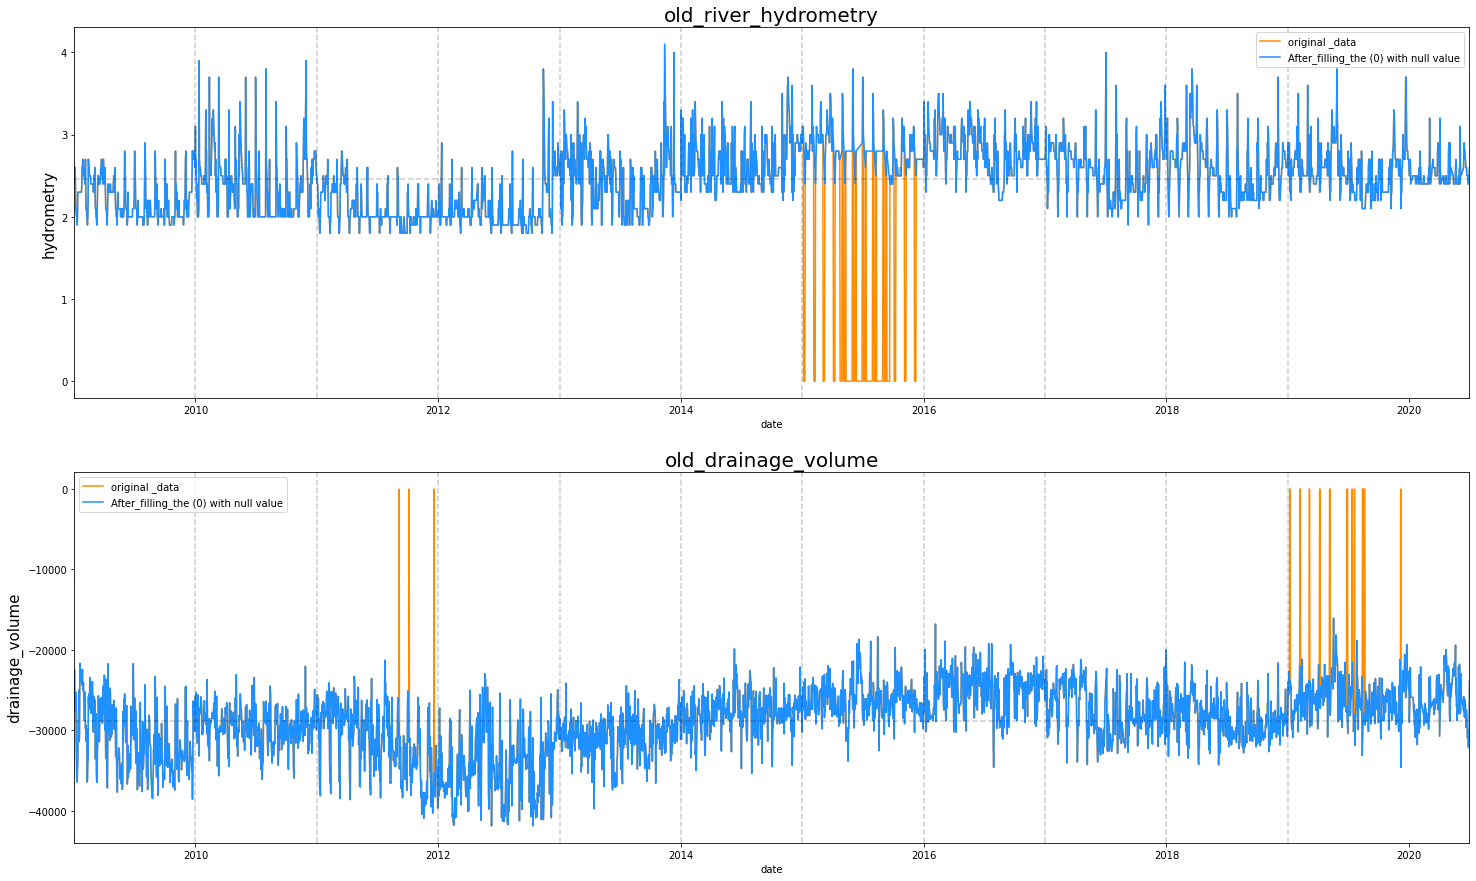

In [17]:
# implement the 0 withthe nulll values to get easy implement in future.

row, ax= plt.subplots(nrows=2, ncols=1, figsize=(25,15))

old_river_hydrometry= df['river_hydrometry'].copy()
old_drainage_volume= df['drainage_volume'].copy()
df['river_hydrometry']= df['river_hydrometry'].replace(0, np.nan)
df['drainage_volume']= df['drainage_volume'].replace(0, np.nan)


sns.lineplot(x=df.date, y=old_river_hydrometry, ax=ax[0], color='darkorange', label='original _data')
sns.lineplot(x=df.date, y=df['river_hydrometry'], ax=ax[0], color='dodgerblue', label='After_filling_the (0) with null value')
ax[0].set_title('old_river_hydrometry', fontsize= 20)
ax[0].set_ylabel('hydrometry',fontsize= 15 )
ax[0].set_xlim([datetime(2009,1,1)], datetime(2020,6,30))
ax[0].axhline(df['river_hydrometry'].mean(), color='k', linestyle='--', alpha=0.2)
for year in range(2009,2020):
                 ax[0].axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
        

sns.lineplot(x=df.date, y=old_drainage_volume, ax=ax[1], color='darkorange', label='original _data')
sns.lineplot(x=df.date, y=df['drainage_volume'], ax=ax[1], color='dodgerblue', label='After_filling_the (0) with null value')
ax[1].set_title('old_drainage_volume' , fontsize= 20)
ax[1].set_ylabel('drainage_volume' ,fontsize= 15 )
ax[1].set_xlim([datetime(2009,1,1)], datetime(2020,6,30))
ax[1].axhline(df['drainage_volume'].mean(), color='k', linestyle='--', alpha=0.2)
for year in range(2009,2020):
                 ax[1].axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
        

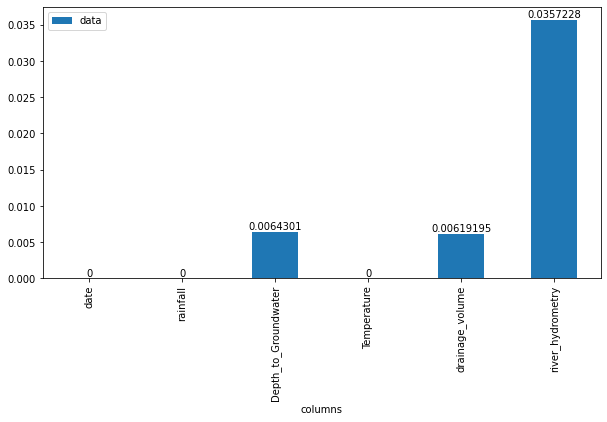

In [18]:
# ploting the ratio of the null values in our data.
def null_ratio(df):
    null= [(col, df[col].isnull().sum() / len(df)) for col in df.columns 
           if df[col].isnull().sum() >= 0]
    col= ['columns', 'data']
    data= pd.DataFrame(null, columns=col)
    pylab.rcParams['figure.figsize']=(10,5)
    ax= data.plot(kind="bar", x='columns', y='data')
    ax.bar_label(ax.containers[0])
        
null_ratio(df)

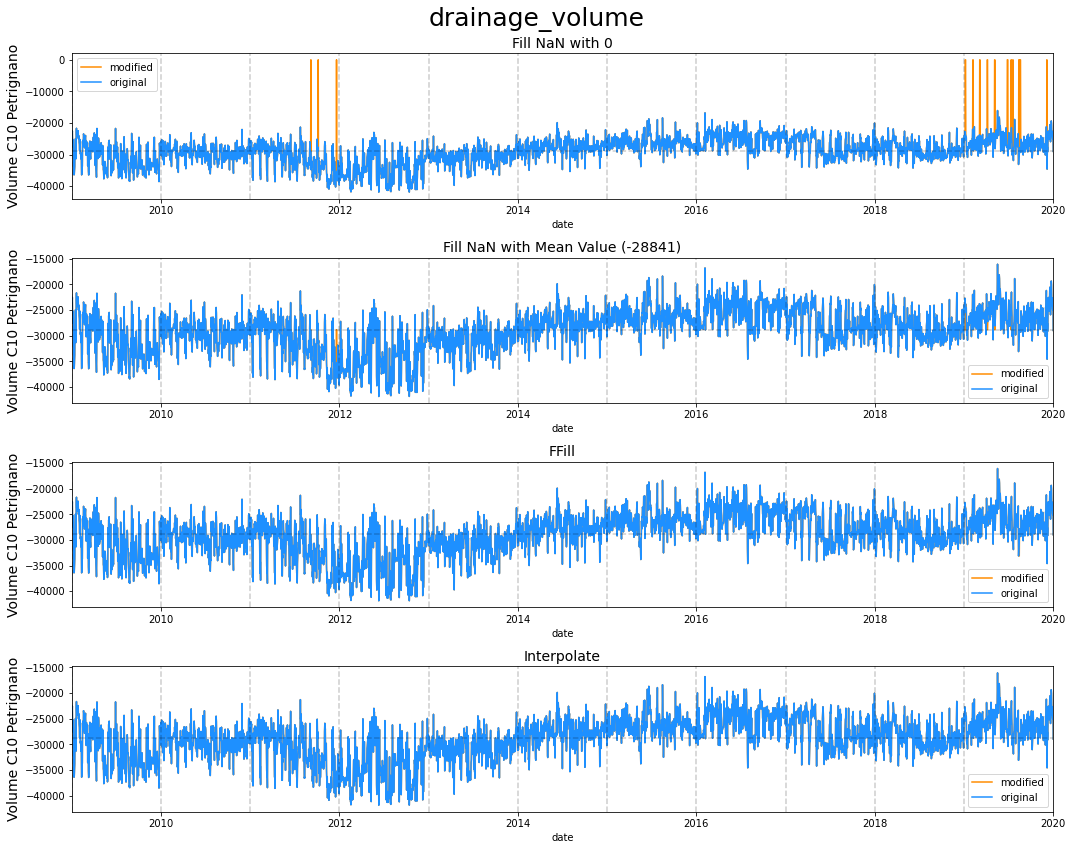

In [19]:
# comparing multi methods to fill the null values in the data.

def compare(col):
    
    f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))
    f.suptitle('{}'.format(col) , fontsize= 25)

    sns.lineplot(x=df['date'], y=df[col].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
    sns.lineplot(x=df['date'], y=df[col], ax=ax[0], color='dodgerblue', label = 'original')
    ax[0].set_title('Fill NaN with 0', fontsize=14)
    ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
    ax[0].axhline(df[col].mean(), linestyle='--', color='k', alpha=0.2)


    mean_drainage = df[col].mean()
    sns.lineplot(x=df['date'], y=df[col].fillna(mean_drainage), ax=ax[1], color='darkorange', label = 'modified')
    sns.lineplot(x=df['date'], y=df[col], ax=ax[1], color='dodgerblue', label = 'original')
    ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
    ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
    ax[1].axhline(df[col].mean(), linestyle='--', color='k', alpha=0.2)


    sns.lineplot(x=df['date'], y=df[col].ffill(), ax=ax[2], color='darkorange', label = 'modified')
    sns.lineplot(x=df['date'], y=df[col], ax=ax[2], color='dodgerblue', label = 'original')
    ax[2].set_title(f'FFill', fontsize=14)
    ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
    ax[2].axhline(df[col].mean(), linestyle='--', color='k', alpha=0.2)


    sns.lineplot(x=df['date'], y=df[col].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
    sns.lineplot(x=df['date'], y=df[col], ax=ax[3], color='dodgerblue', label = 'original')
    ax[3].set_title(f'Interpolate', fontsize=14)
    ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
    ax[3].axhline(df[col].mean(), linestyle='--', color='k', alpha=0.2)
    

    for i in range(4):
        for year in range(2009,2020):
            ax[i].axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
            

    for i in range(4):
        ax[i].set_xlim([date(2009, 1, 1), date(2020, 1, 1)])
    
    plt.tight_layout()
    plt.show()

compare('drainage_volume')   

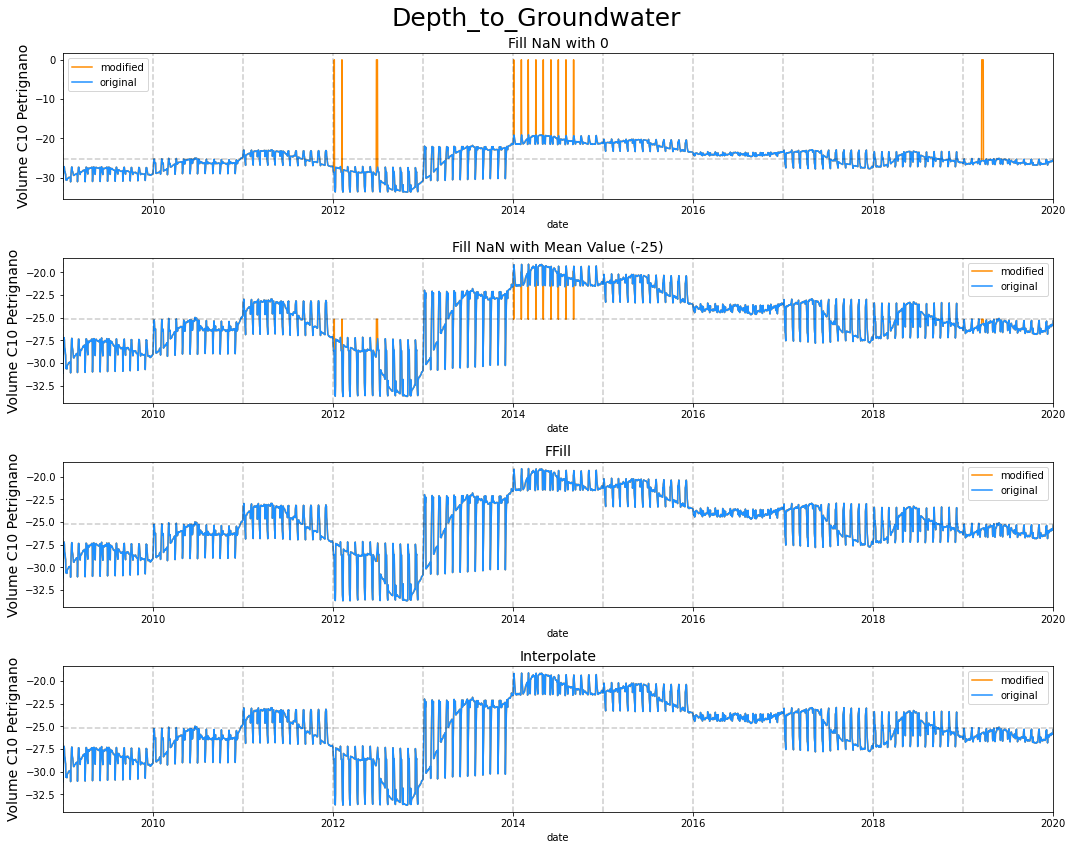

In [20]:
compare('Depth_to_Groundwater')  

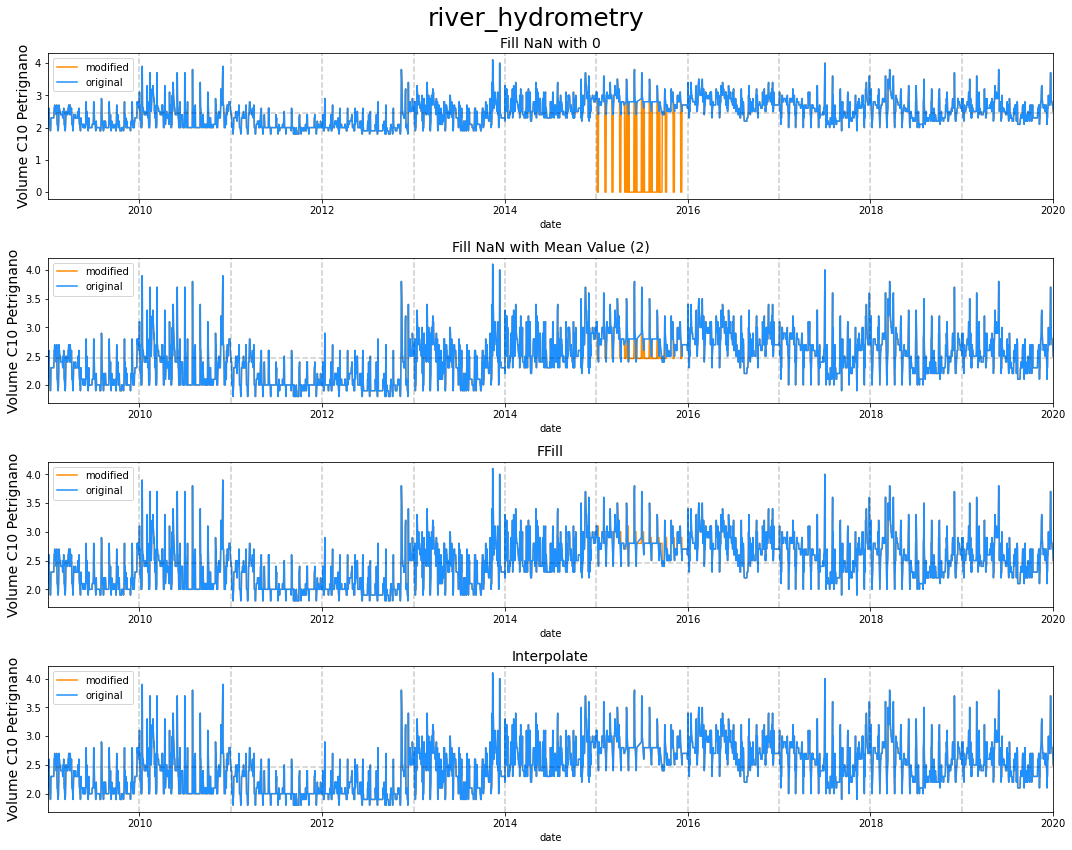

In [21]:
compare('river_hydrometry')

In [22]:
df['river_hydrometry']= df.river_hydrometry.interpolate()
df['Depth_to_Groundwater']= df.Depth_to_Groundwater.interpolate()
df['drainage_volume']= df.drainage_volume.interpolate()

In [23]:
df.isnull().sum()

date                    0
rainfall                0
Depth_to_Groundwater    0
Temperature             0
drainage_volume         0
river_hydrometry        0
dtype: int64

In [24]:
# resample our data to add more insights.
df[['date','drainage_volume']].resample('7D', on='date').sum().reset_index()

date  drainage_volume
0   2009-01-01      -184072.608
1   2009-01-08      -232432.416
2   2009-01-15      -178242.336
3   2009-01-22      -166980.960
4   2009-01-29      -188299.296
..         ...              ...
618 2020-11-05       -50984.640
619 2020-11-12            0.000
620 2020-11-19            0.000
621 2020-11-26       -53820.288
622 2020-12-03      -105171.264

[623 rows x 2 columns]

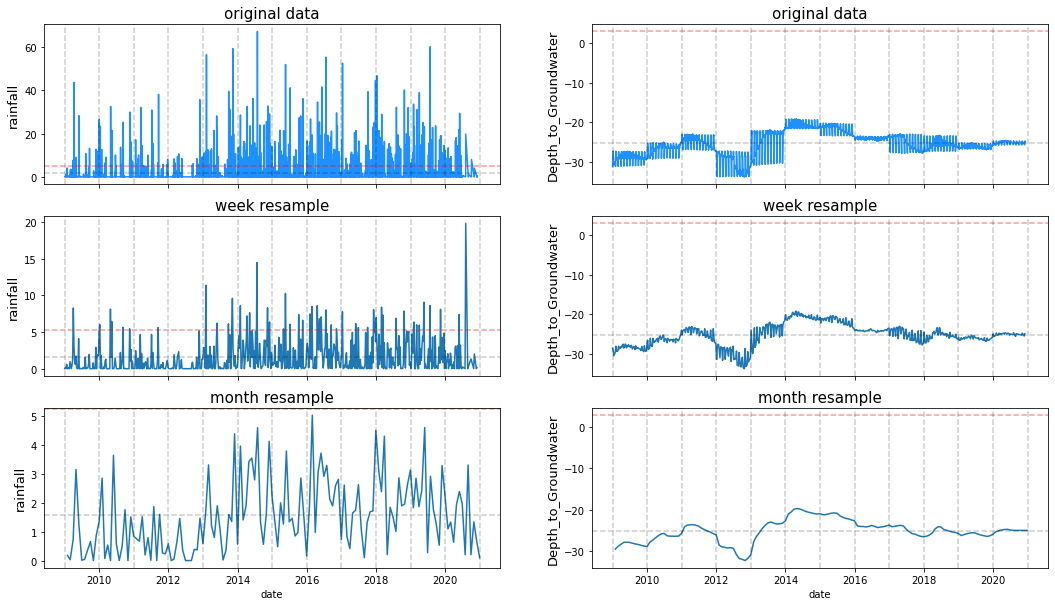

In [25]:
# data before resample and after resample.
def downsample(col, cola):

    row, ax= plt.subplots(ncols=2, nrows=3, sharex= True, figsize=(18,10))
    week_resample= df[['date',col]].resample('7D', on='date').mean().reset_index()
    monthe_resample= df[['date',col]].resample('M', on='date').mean().reset_index()
    
    sns.lineplot(df['date'], df[col], color='dodgerblue', ax=ax[0,0])
    ax[0,0].set_title('original data', fontsize=15)
    ax[0,0].set_ylabel(col, fontsize=13)
    
    
    sns.lineplot(week_resample['date'], week_resample[col], ax=ax[1,0])
    ax[1,0].set_title('week resample', fontsize= 15)
    ax[1,0].set_ylabel(col, fontsize=13)
    
    sns.lineplot(monthe_resample['date'], monthe_resample[col], ax=ax[2,0])
    ax[2,0].set_title('month resample', fontsize= 15)
    ax[2,0].set_ylabel(col, fontsize=13)
    
    for i in range(3):
        for year in range(2009,2022):
            ax[i,0].axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
    
    for i in range(3):
        ax[i,0].axhline(df[col].mean(), color='k', linestyle='--', alpha=0.2)
        
    for i in range(3):
        ax[i,0].axhline(df[col].std(), color='r', linestyle='--', alpha=0.4, label='mean')
    
    

    week_resample= df[['date',cola]].resample('7D', on='date').mean().reset_index()
    monthe_resample= df[['date',cola]].resample('M', on='date').mean().reset_index()
    
    sns.lineplot(df['date'], df[cola], color='dodgerblue', ax=ax[0,1])
    ax[0,1].set_title('original data', fontsize=15)
    ax[0,1].set_ylabel(cola, fontsize=13)
    

    sns.lineplot(week_resample['date'], week_resample[cola], ax=ax[1,1])
    ax[1,1].set_title('week resample', fontsize= 15)
    ax[1,1].set_ylabel(cola, fontsize=13)
    
    sns.lineplot(monthe_resample['date'], monthe_resample[cola], ax=ax[2,1])
    ax[2,1].set_title('month resample', fontsize= 15)
    ax[2,1].set_ylabel(cola, fontsize=13)
    
    for i in range(3):
        for year in range(2009,2022):
            ax[i,1].axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
    
    for i in range(3):
        ax[i,1].axhline(df[cola].mean(), color='k', linestyle='--', alpha=0.2)
        
    
    for i in range(3):
        ax[i,1].axhline(df[cola].std(), color='r', linestyle='--', alpha=0.4, label='std')
        
    plt.show()

downsample('rainfall', 'Depth_to_Groundwater')

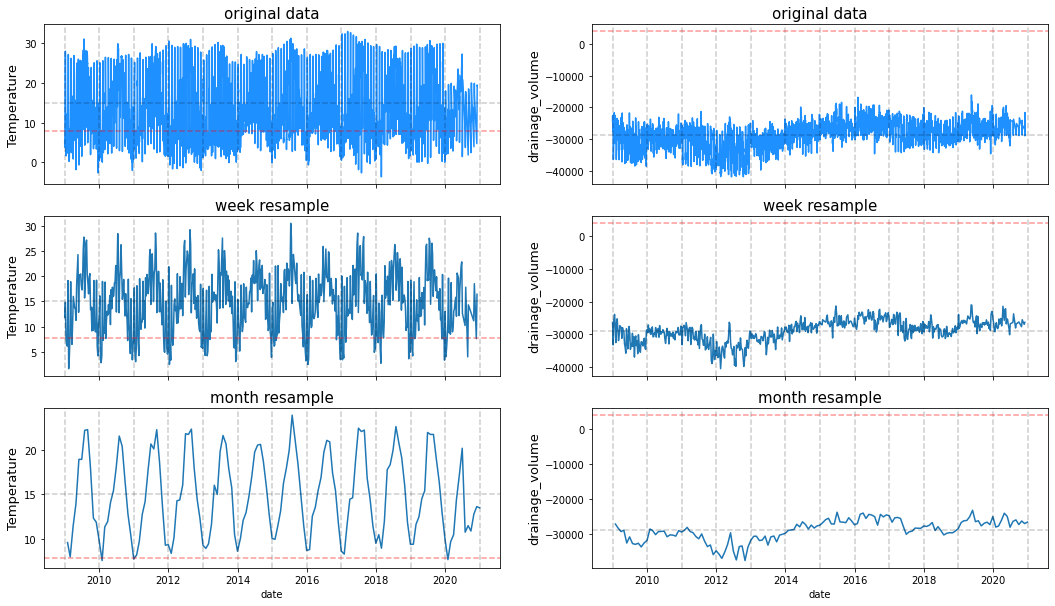

In [26]:
downsample('Temperature','drainage_volume')

In [27]:
df.columns

Index(['date', 'rainfall', 'Depth_to_Groundwater', 'Temperature',
       'drainage_volume', 'river_hydrometry'],
      dtype='object')

In [28]:
df= df[['date', 'rainfall', 'Depth_to_Groundwater', 'Temperature',
       'drainage_volume', 'river_hydrometry']].resample('7D',on='date').mean().reset_index().ffill()

In [29]:
df.head()

date  rainfall  Depth_to_Groundwater  Temperature  drainage_volume  \
0 2009-01-01  0.000000            -28.560000    11.814286    -26296.086857   
1 2009-01-08  0.157143            -29.232857    14.814286    -33204.630857   
2 2009-01-15  0.028571            -30.420000     7.528571    -25463.190857   
3 2009-01-22  0.585714            -30.018571     6.214286    -23854.422857   
4 2009-01-29  0.000000            -29.641429     6.142857    -26899.899429   

   river_hydrometry  
0          2.342857  
1          2.114286  
2          2.300000  
3          2.500000  
4          2.514286

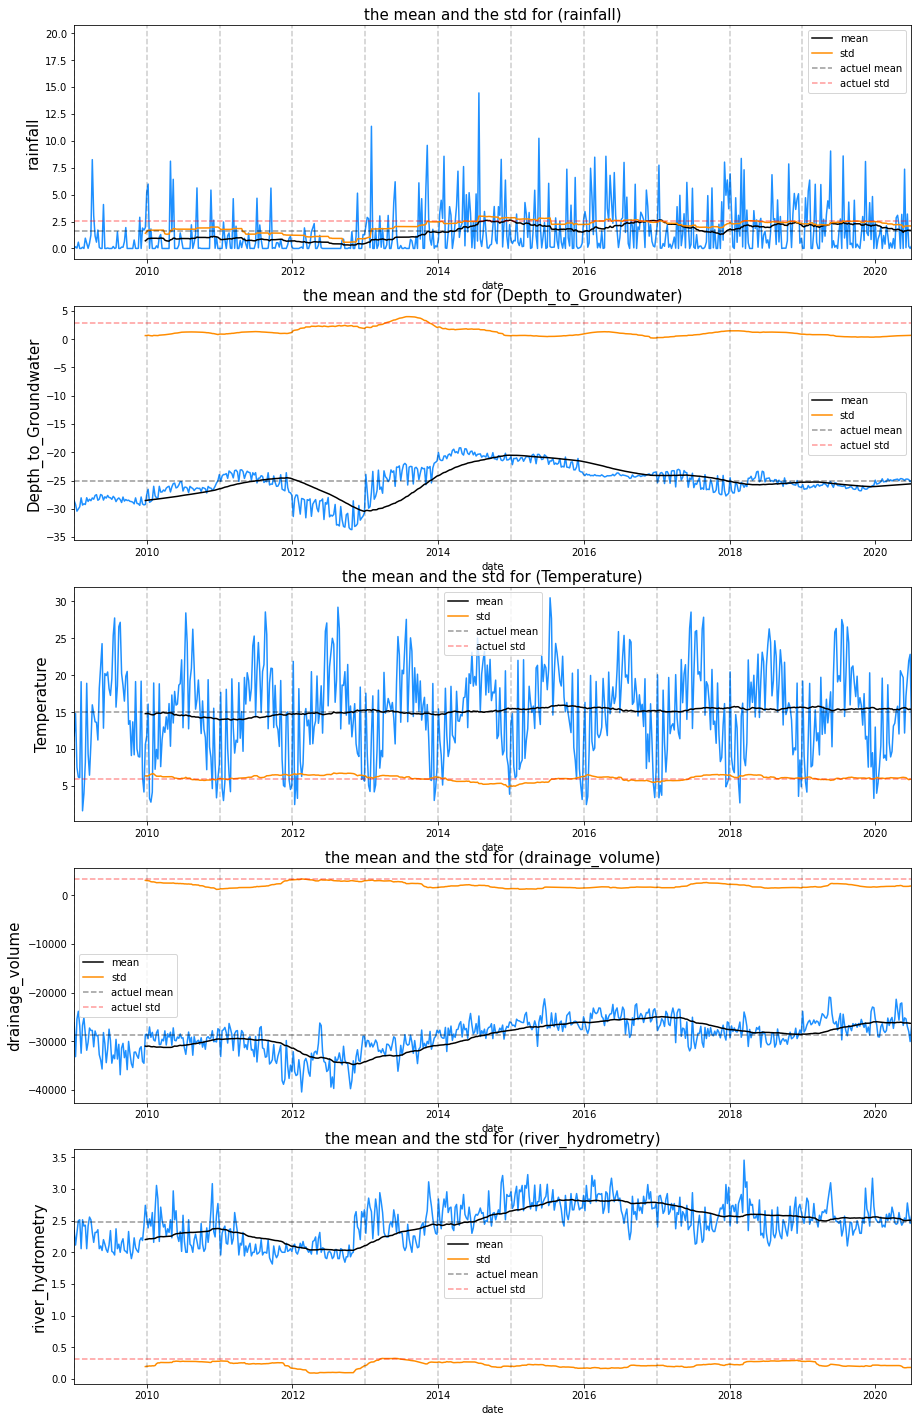

In [30]:
# cheking the conistent mean and std for the data

window= 52
fig, ax= plt.subplots(ncols=1, nrows=5, figsize=(15,25))

for i,col in enumerate(df.columns[1:]):
    sns.lineplot(df['date'], df[col], ax=ax[i], color= 'dodgerblue')
    sns.lineplot(df['date'], df[col].rolling(window).mean(),ax=ax[i], color='black', label='mean')
    sns.lineplot(df['date'], df[col].rolling(window).std(), ax=ax[i], color='darkorange', label='std')
    ax[i].set_title(f'the mean and the std for ({col})', fontsize=15)

    ax[i].set_ylabel(col, fontsize=15)
    ax[i].set_xlim([date(2009,1,1), date(2020,6,30)])
    for year in range(2009,2020):
        ax[i].axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
        
    ax[i].axhline(df[col].mean(), color='k', linestyle='--', alpha=0.4, label='actuel mean')
    ax[i].axhline(df[col].std(), color='r', linestyle='--', alpha=0.4, label='actuel std')

    ax[i].legend()

In [31]:
test= adfuller(df['rainfall'].values)

In [32]:
test[0], test[1]

(-13.576560711105797, 2.163934650348006e-25)

In [33]:
test

(-13.576560711105797,
 2.163934650348006e-25,
 1,
 621,
 {'1%': -3.440924132966757,
  '5%': -2.866205413627313,
  '10%': -2.5692545786625383},
 2804.999688658786)

In [34]:
# alpha=0.05
# fig, ax= plt.subplots(nrows=5, ncols=1, figsize=(24,25))

# for i,col in enumerate(df.columns[1:]):
#     test= adfuller(df[col].values)
    
#     if test[1] > alpha:
#         color= 'darkorange'
#     elif test[1] <= alpha:
#         color = 'black'
        
#     sns.lineplot(df['date'], df[col], ax=ax[i], color=color)
#     ax[i].set_title('the adf test = {} & the p_value= {}'.format(test[0],test[1]), fontsize=25)
#     ax[i].set_xlim([date(2009,1,1), date(2020,6,30)])
#     ax[i].set_ylabel(col, fontsize=20)
#     for year in range(2009,2021):
#         ax[i].axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--', color='k', alpha=0.2)
# plt.tight_layout()

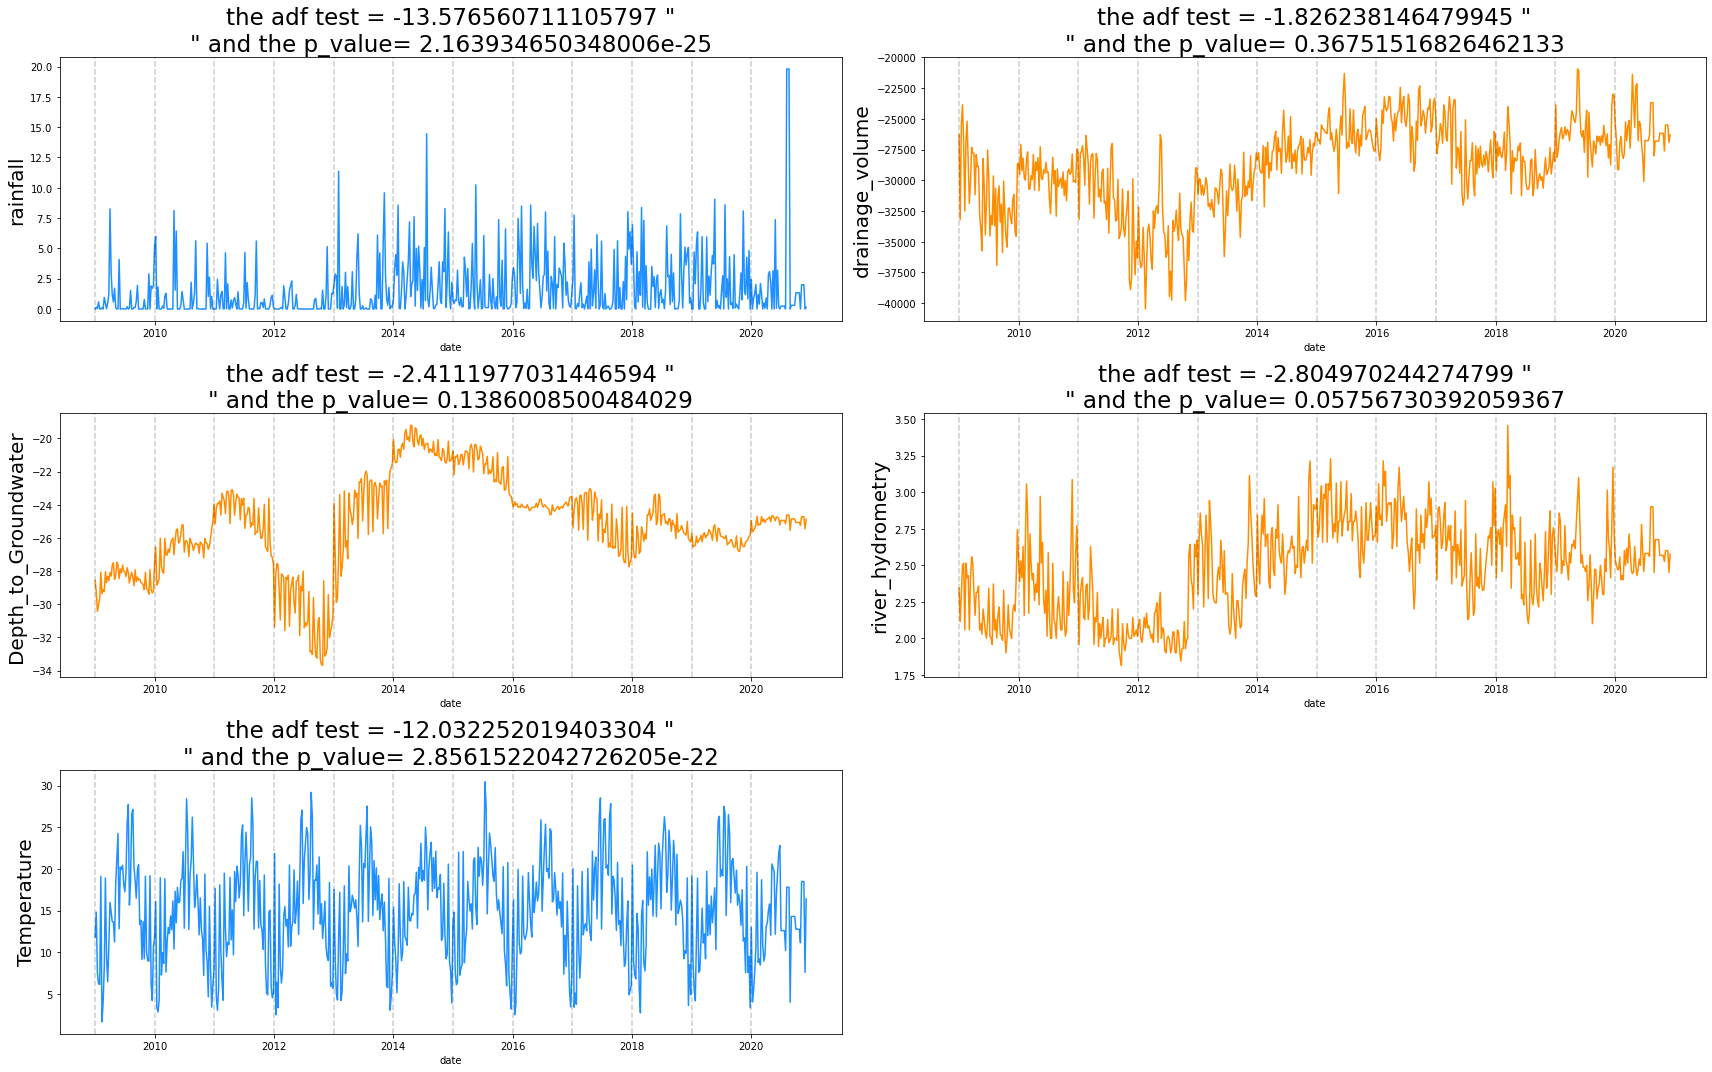

In [35]:
# adf test for stationary.

alpha=0.05
fig, ax= plt.subplots(nrows=3, ncols=2, figsize=(24,15))

def compa(ax,col):
    
    test= adfuller(df[col].values)
    
    if test[1] > alpha:
        color= 'darkorange'
    else:
        color= 'dodgerblue'
        
    sns.lineplot(df['date'], df[col], ax=ax, color=color)
    ax.set_title('the adf test = {} "\n" and the p_value= {}'.format(test[0],test[1]), fontsize=23)
    ax.set_ylabel(col, fontsize=20)
    for year in range(2009,2021):
        ax.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--', color='k', alpha=0.2)
    
    
compa(ax[0,0],'rainfall')
compa(ax[1,0],'Depth_to_Groundwater')
compa(ax[2,0],'Temperature')
compa(ax[0,1],'drainage_volume')
compa(ax[1,1],'river_hydrometry')

plt.tight_layout()
ax[2,1].remove()

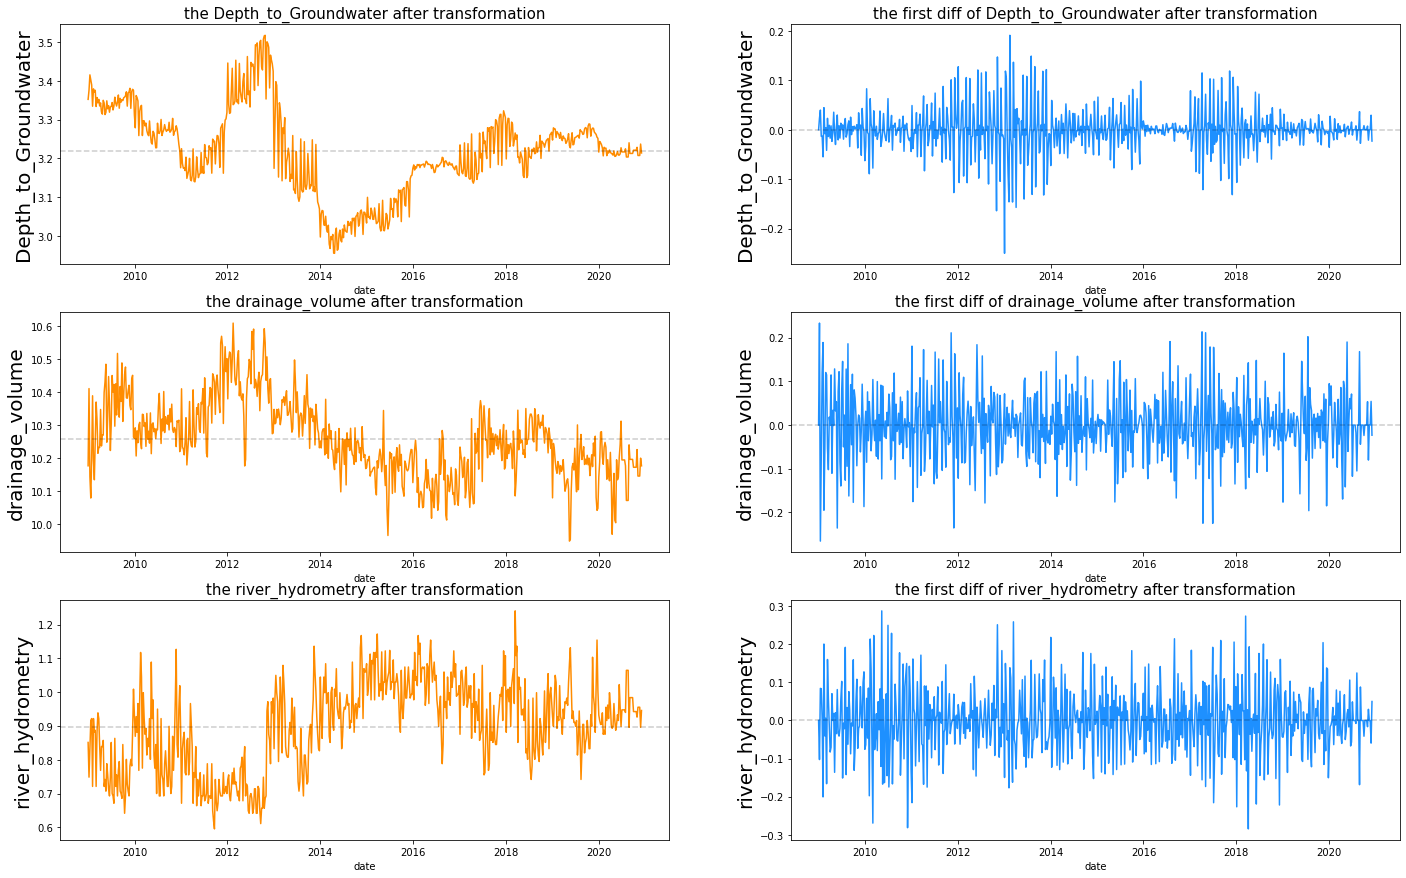

In [36]:
# the feature after transformation.

df_= df.copy()
fig, ax= plt.subplots(nrows=3, ncols=2, figsize=(24,15))

def trans(ax1, col, ax):
        
    df_[col]= np.log(abs(df_[col]))
    sns.lineplot(df_['date'],df_[col] , ax=ax1, color='darkorange')
    ax1.set_ylabel(col, fontsize=20)
    ax1.set_title('the {} after transformation'.format(col), fontsize=15)
    ax1.axhline(df_[col].mean(), linestyle='--', color='k', alpha=0.2)
    
    df_[col]= df_[col].diff().fillna(0)
    sns.lineplot(df_['date'], df_[col], ax=ax, color='dodgerblue')
    ax.set_ylabel(col, fontsize=20)
    ax.set_title('the first diff of {} after transformation'.format(col), fontsize=15)
    ax.axhline(df_[col].mean(), linestyle='--', color='k', alpha=0.2)
    
trans(ax[0,0], 'Depth_to_Groundwater', ax[0,1])
trans(ax[1,0], 'drainage_volume', ax[1,1])
trans(ax[2,0], 'river_hydrometry', ax[2,1])

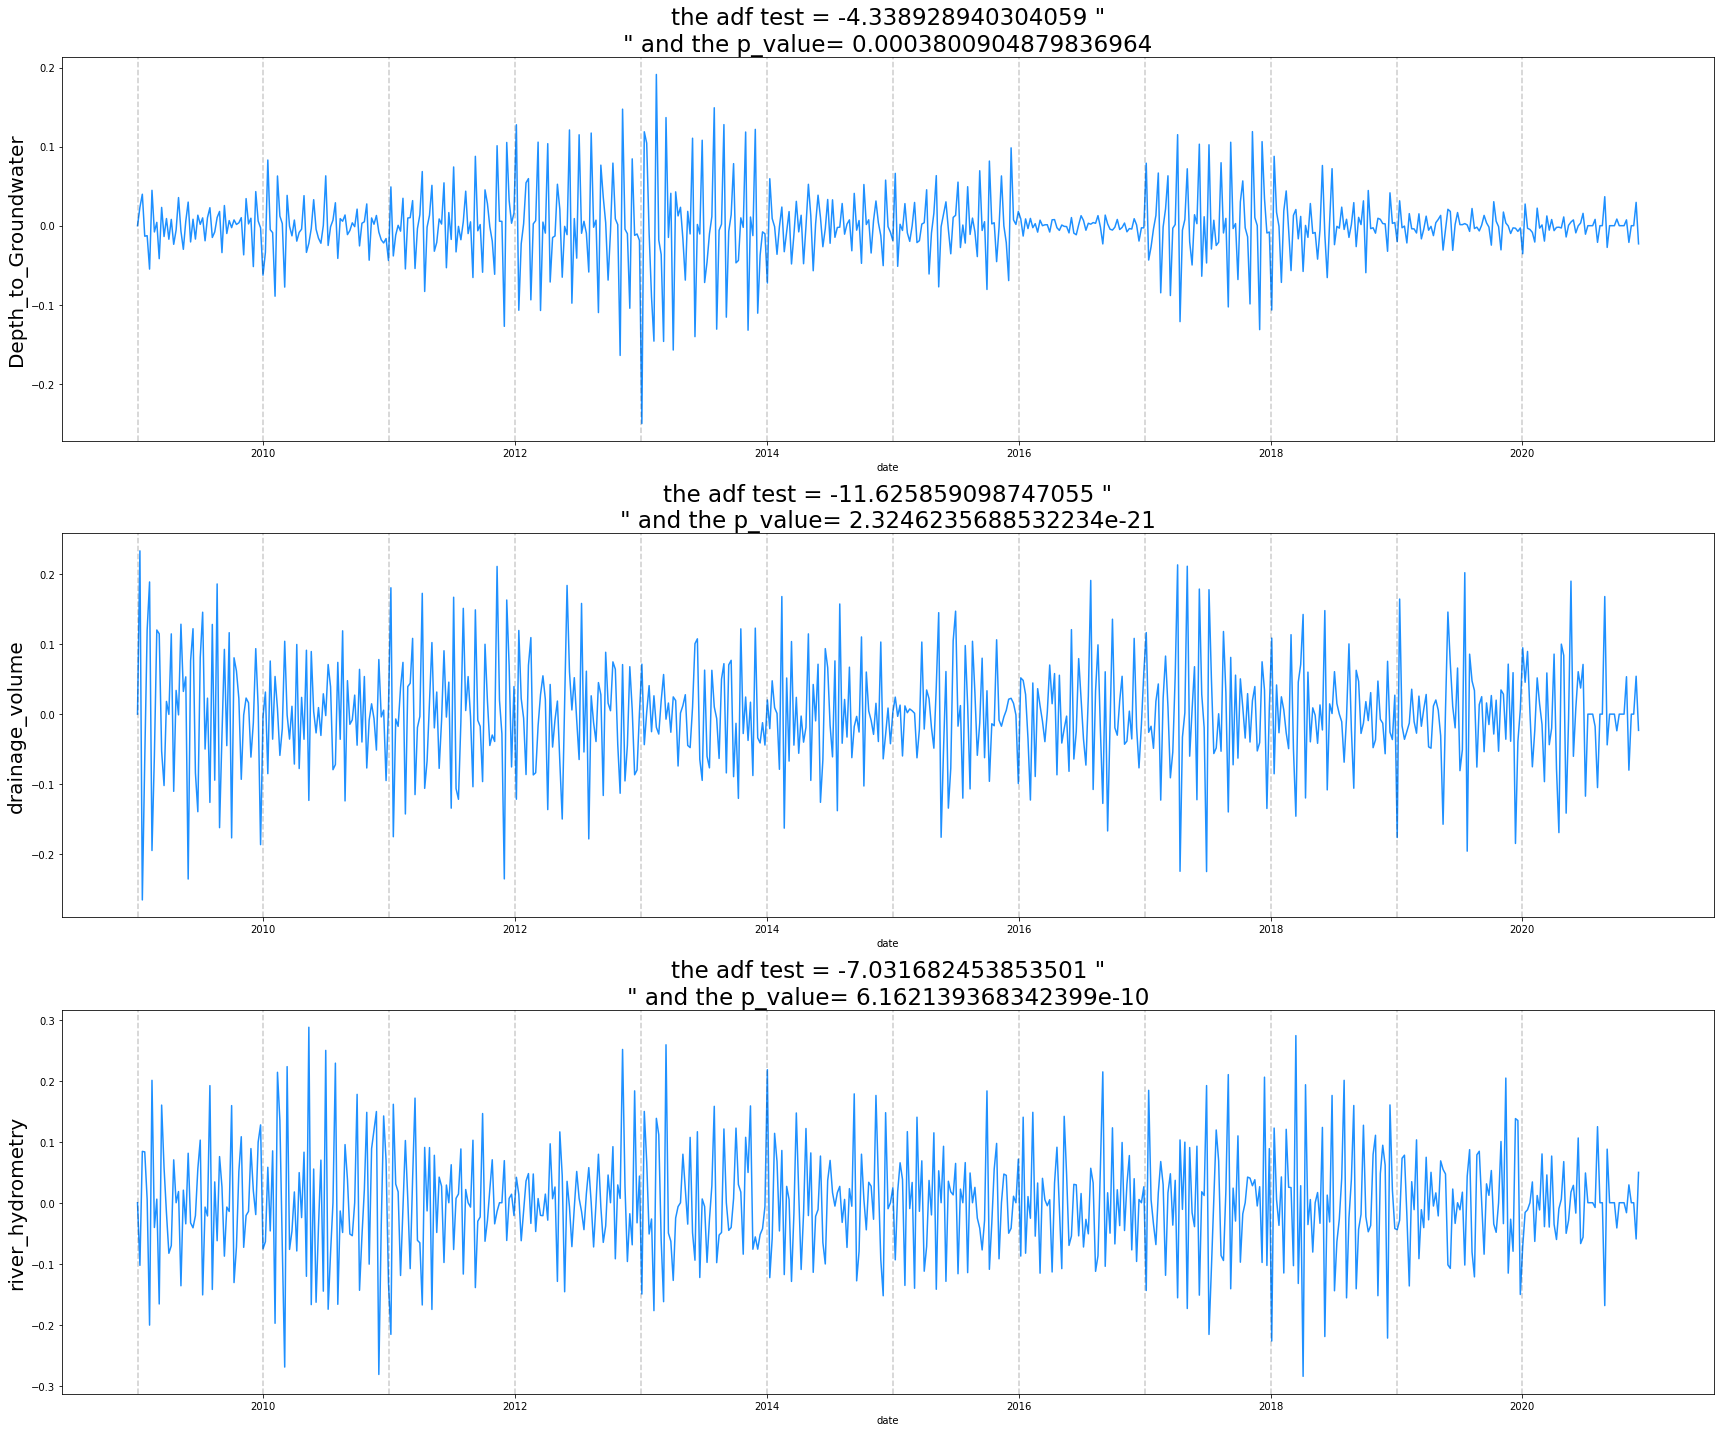

In [37]:
alpha=0.05
fig, ax= plt.subplots(nrows=3, ncols=1, figsize=(24,20))

def compa(ax,col):
    
    test= adfuller(df_[col].values)
    
    if test[1] > alpha:
        color= 'darkorange'
    else:
        color= 'dodgerblue'
        
    sns.lineplot(df_['date'], df_[col], ax=ax, color=color)
    ax.set_title('the adf test = {} "\n" and the p_value= {}'.format(test[0],test[1]), fontsize=23)
    ax.set_ylabel(col, fontsize=20)
    for year in range(2009,2021):
        ax.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--', color='k', alpha=0.2)


compa(ax[0], 'Depth_to_Groundwater')
compa(ax[1], 'drainage_volume')
compa(ax[2], 'river_hydrometry')

plt.tight_layout()

In [38]:
# feature engineering

def feature_eng(col):
    df_['year']= pd.DatetimeIndex(df_[col]).year
    df_['month']= pd.DatetimeIndex(df_[col]).month
    df_['week']=df_['date'].dt.isocalendar().week
    df_['day']= pd.DatetimeIndex(df_[col]).day
    df_['quarter']= pd.DatetimeIndex(df_[col]).quarter
    df_['season']= df_['month']% 12 // 3+1
    
    season={12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
    
    df_['seas']= df_['month'].apply(lambda x: season[x])
    
feature_eng('date')
df_.head()

date  rainfall  Depth_to_Groundwater  Temperature  drainage_volume  \
0 2009-01-01  0.000000              0.000000    11.814286         0.000000   
1 2009-01-08  0.157143              0.023286    14.814286         0.233269   
2 2009-01-15  0.028571              0.039807     7.528571        -0.265455   
3 2009-01-22  0.585714             -0.013284     6.214286        -0.065264   
4 2009-01-29  0.000000             -0.012643     6.142857         0.120153   

   river_hydrometry  year  month  week  day  quarter  season    seas  
0          0.000000  2009      1     1    1        1       1  Winter  
1         -0.102654  2009      1     2    8        1       1  Winter  
2          0.084192  2009      1     3   15        1       1  Winter  
3          0.083382  2009      1     4   22        1       1  Winter  
4          0.005698  2009      1     5   29        1       1  Winter

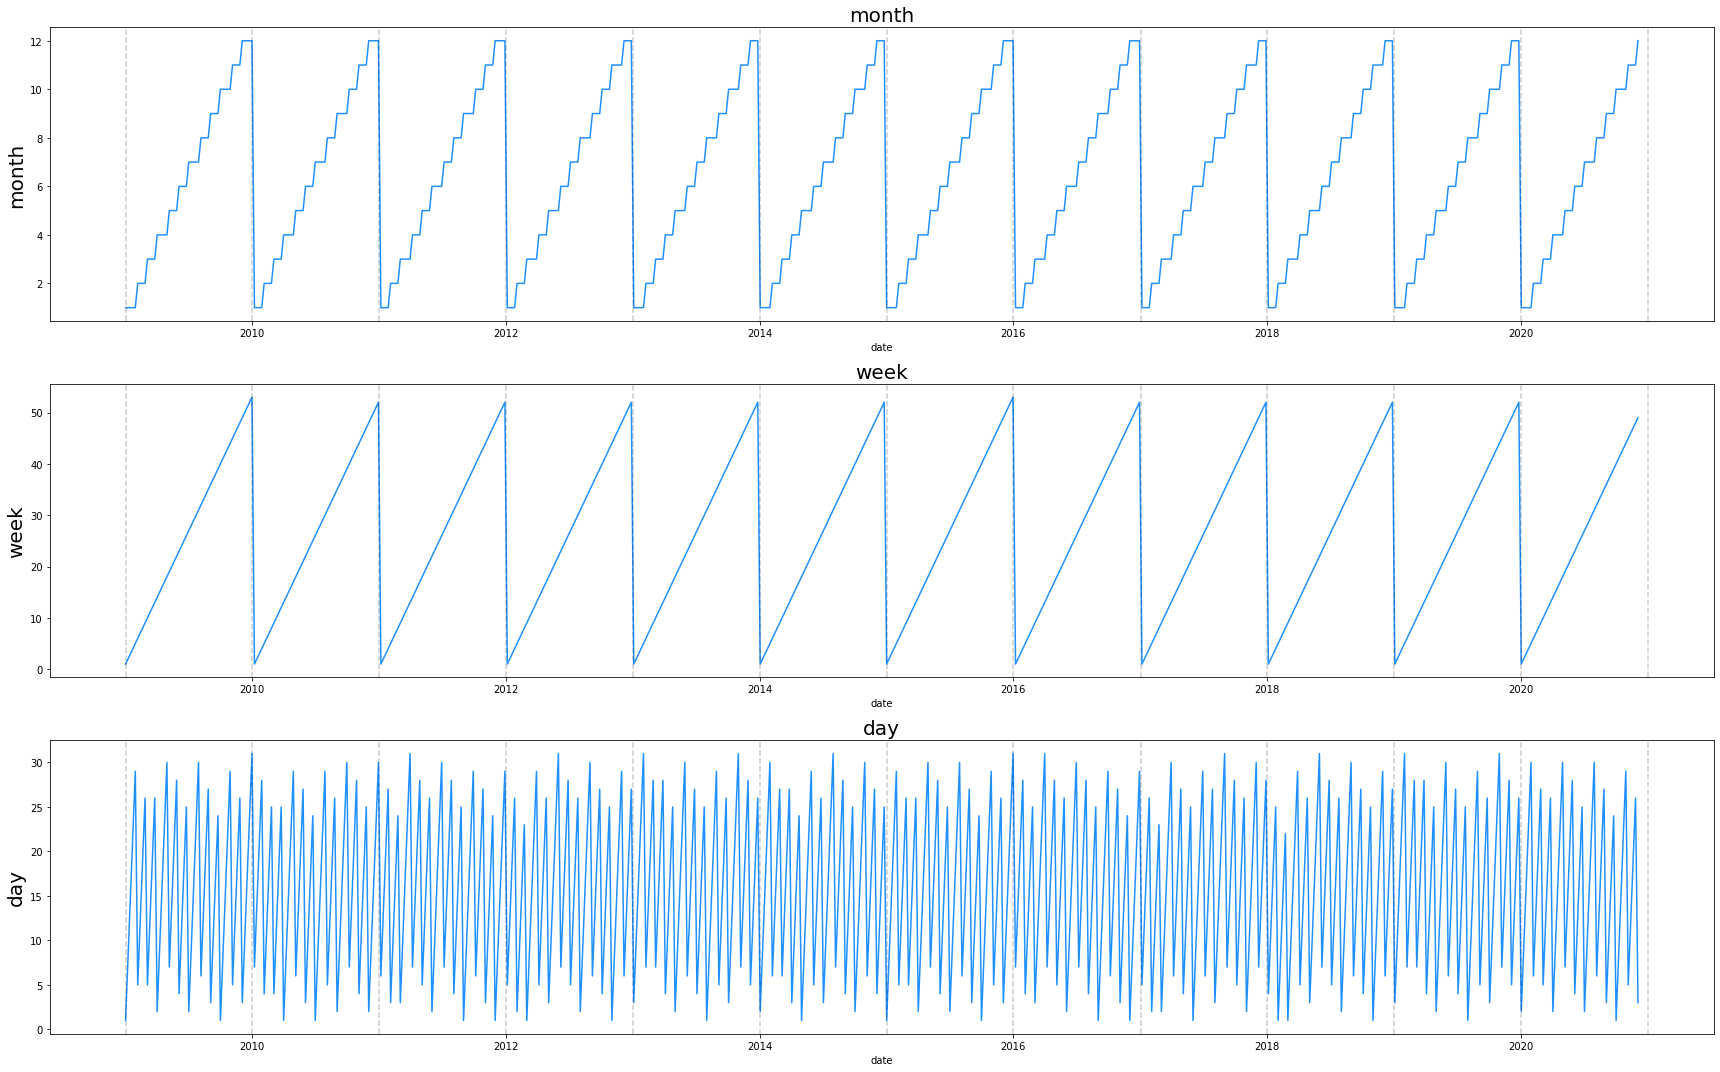

In [39]:
# check the Cycle in the months & weeks

fig, ax= plt.subplots(ncols=1, nrows= 3, figsize=(24,15))

for i, col in enumerate(df_.columns[7:-3]):
    sns.lineplot(df_['date'], df_[col], ax=ax[i], color='dodgerblue')
    ax[i].set_title(col, fontsize=20)
    ax[i].set_ylabel(col, fontsize=20)
    
    for year in range(2009,2022):
        ax[i].axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
        
plt.tight_layout()

In [40]:
# encoding the Cyclical Features using get_dummies
ex_df=df_.copy()
ex_df= ex_df.set_index(df['date'])
ex_df.drop(['date','month'], inplace=True, axis=1)
ex_df= ex_df.asfreq('d').ffill()
ex_df['month']= pd.DatetimeIndex(ex_df.index).month
ex_df= pd.get_dummies(ex_df, columns=['month'], drop_first=True)
ex_df= ex_df[['month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12']]

ex_df= ex_df.loc['2009-01-01':'2011-01-01']
ex_df

month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
date                                                                        
2009-01-01        0        0        0        0        0        0        0   
2009-01-02        0        0        0        0        0        0        0   
2009-01-03        0        0        0        0        0        0        0   
2009-01-04        0        0        0        0        0        0        0   
2009-01-05        0        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
2010-12-28        0        0        0        0        0        0        0   
2010-12-29        0        0        0        0        0        0        0   
2010-12-30        0        0        0        0        0        0        0   
2010-12-31        0        0        0        0        0        0        0   
2011-01-01        0        0        0        0        0        0        0   

            month_9  month_10  month_11  month_12  
date                                               
2009-01-01        0         0         0         0  
2009-01-02        0         0         0         0  
2009-01-03        0         0         0         0  
2009-01-04        0         0         0         0  
2009-01-05        0         0         0         0  
...             ...       ...       ...       ...  
2010-12-28        0         0         0         1  
2010-12-29        0         0         0         1  
2010-12-30        0         0         0         1  
2010-12-31        0         0         0         1  
2011-01-01        0         0         0         0  

[731 rows x 11 columns]

<AxesSubplot:xlabel='date'>

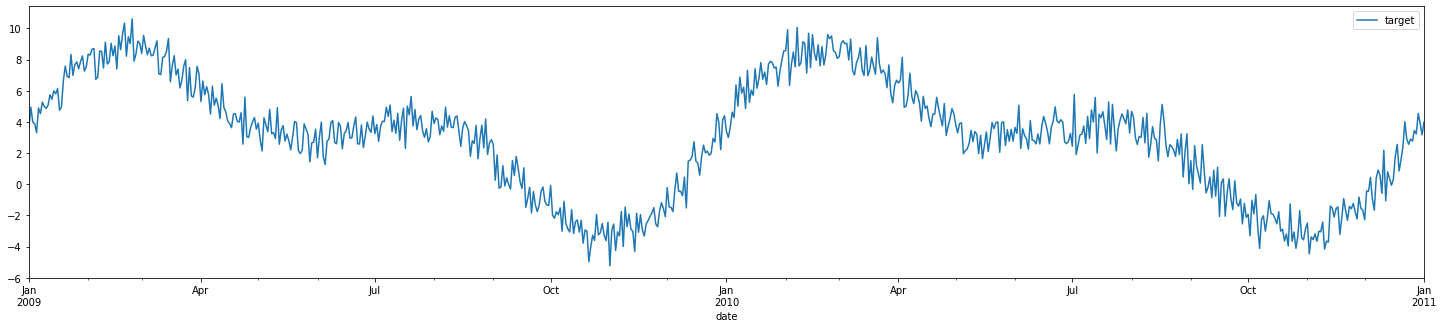

In [41]:
# making a target to test get_dummies method
ex_df['n_day']= range(len(ex_df))

signal_1 = 3 + 4 * np.sin(ex_df["n_day"] / 365 * 2 * np.pi)
signal_2 = 3 * np.sin(ex_df["n_day"] / 365 * 4 * np.pi + 365/2)
noise = np.random.normal(0, 0.85, len(ex_df))

# combine them to get the target series
y = signal_1 + signal_2 + noise

y= y.to_frame()
y.columns = ['target']
y= y.set_index(ex_df.index)
y.plot(figsize=(25,5))

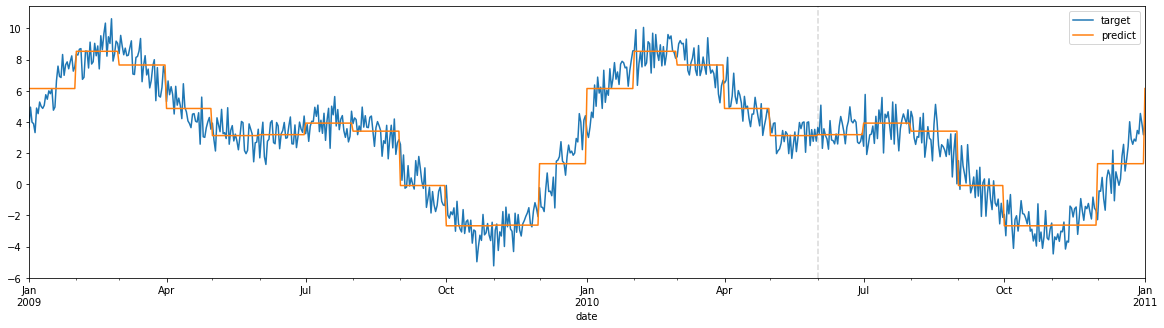

In [42]:
# train the our model for testing
from sklearn.linear_model import LinearRegression

train_end= datetime(2010,6,1)
ex_df.drop('n_day', inplace=True, axis=1)

model= LinearRegression().fit(ex_df.loc[:train_end], y.loc[:train_end])

y['predict']= model.predict(ex_df)
y[['target', 'predict']].plot(figsize=(20,5))

plt.axvline(train_end, linestyle='--', color='k', alpha=0.15)

In [43]:
# using sin and cos method
from sklearn.preprocessing import FunctionTransformer

def sin_transform(period):
    return FunctionTransformer(lambda x: np.sin(x/period*2*np.pi))
    
def cos_transform(period):
    return FunctionTransformer(lambda x: np.cos(x/period*2*np.pi))

In [47]:
# ex_df1= pd.DataFrame()
# ex_df2= pd.DataFrame()

In [48]:
# making a dataframe for both month and weeks to see the Effect of the sin and cos method
ex_df1['month']= ex_df.index.month.to_frame().set_index(ex_df.index)
ex_df2['week']= ex_df.index.week.to_frame().set_index(ex_df.index)

In [49]:
ex_df1['month_sin']= sin_transform(12).fit_transform(ex_df1)['month']
ex_df1['month_cos']= cos_transform(12).fit_transform(ex_df1)['month']
ex_df1.head()

month  month_sin  month_cos
date                                   
2009-01-01      1        0.5   0.866025
2009-01-02      1        0.5   0.866025
2009-01-03      1        0.5   0.866025
2009-01-04      1        0.5   0.866025
2009-01-05      1        0.5   0.866025

In [50]:
ex_df2['week_sin']= sin_transform(53).fit_transform(ex_df2)['week']
ex_df2['week_cos']= cos_transform(53).fit_transform(ex_df2)['week']
ex_df2.head()

week  week_sin  week_cos
date                                
2009-01-01     1  0.118273  0.992981
2009-01-02     1  0.118273  0.992981
2009-01-03     1  0.118273  0.992981
2009-01-04     1  0.118273  0.992981
2009-01-05     2  0.234886  0.972023

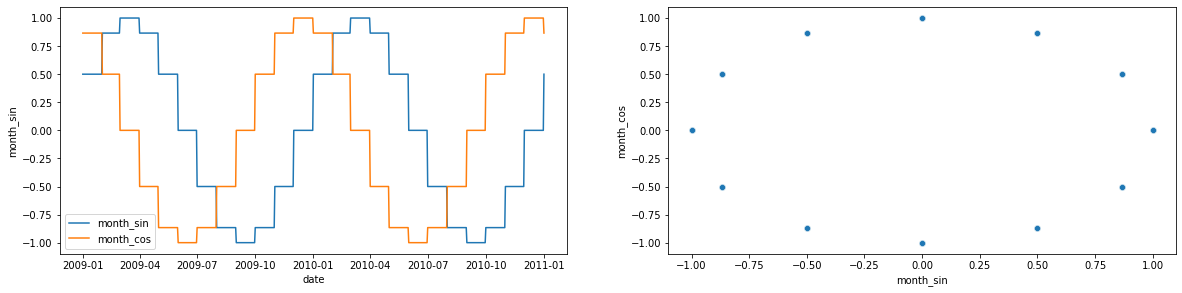

In [51]:
# ploting the month_sin and month_cos
fig, ax= plt.subplots(nrows=2,ncols=2,figsize=(20,10))

sns.lineplot(x=ex_df1.index, y=ex_df1['month_sin'],ax=ax[0,0], label='month_sin')
sns.lineplot(x=ex_df1.index, y=ex_df1['month_cos'],ax=ax[0,0], label='month_cos')

sns.scatterplot(x=ex_df1['month_sin'], y=ex_df1['month_cos'],ax=ax[0,1])

ax[1,0].remove()
ax[1,1].remove()

In [52]:
ex_df3= ex_df1.copy()
ex_df3.drop('month',axis=1, inplace=True)

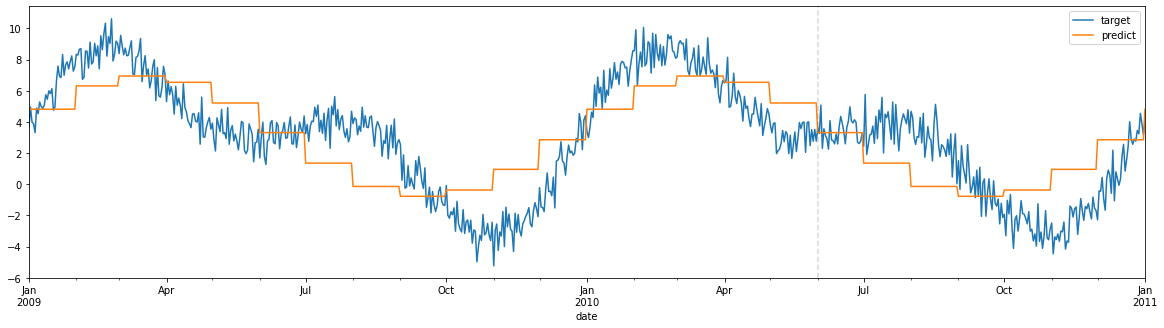

In [53]:
# testing our month_cos and month_sin on our target
train_end= datetime(2010,6,1)

model= LinearRegression().fit(ex_df3.loc[:train_end], y.loc[:train_end])

y['predict']= model.predict(ex_df3)
y[['target', 'predict']].plot(figsize=(20,5))

plt.axvline(train_end, linestyle='--', color='k', alpha=0.15)

In [54]:
ex_df4= ex_df2.copy()
ex_df4.drop('week',axis=1, inplace=True)

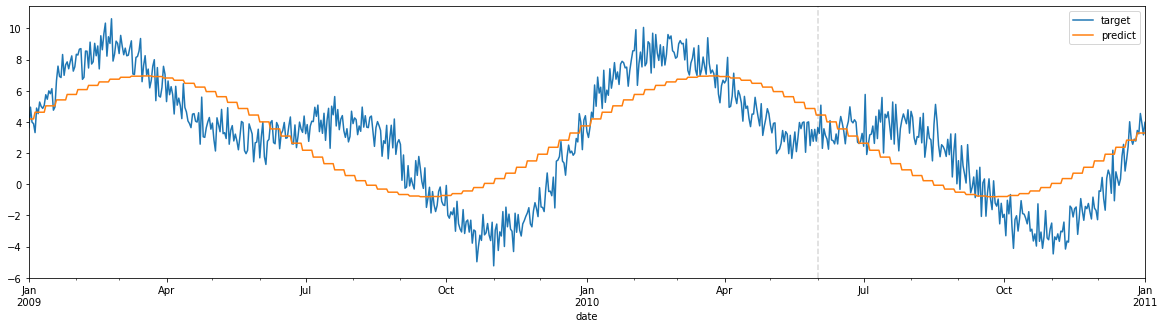

In [55]:
# testing our week_cos and week_sin on our target
train_end= datetime(2010,6,1)

model= LinearRegression().fit(ex_df4.loc[:train_end], y.loc[:train_end])

y['predict']= model.predict(ex_df4)
y[['target', 'predict']].plot(figsize=(20,5))

plt.axvline(train_end, linestyle='--', color='k', alpha=0.15)

In [56]:
# testing RepeatingBasis method
from sklego.preprocessing import RepeatingBasisFunction

model= RepeatingBasisFunction(n_periods=12,
                             column='month',
                             input_range=(1,12),
                             remainder='drop')

model.fit(ex_df1)

ex_df3= pd.DataFrame(index= ex_df1.index, data= model.transform(ex_df1))

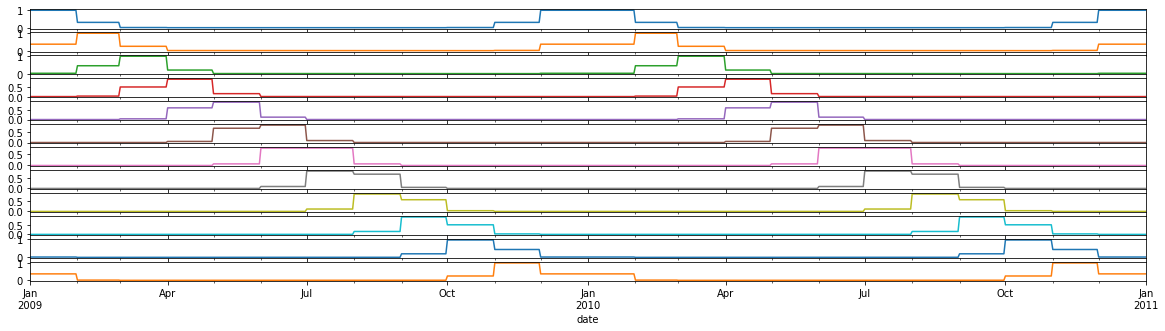

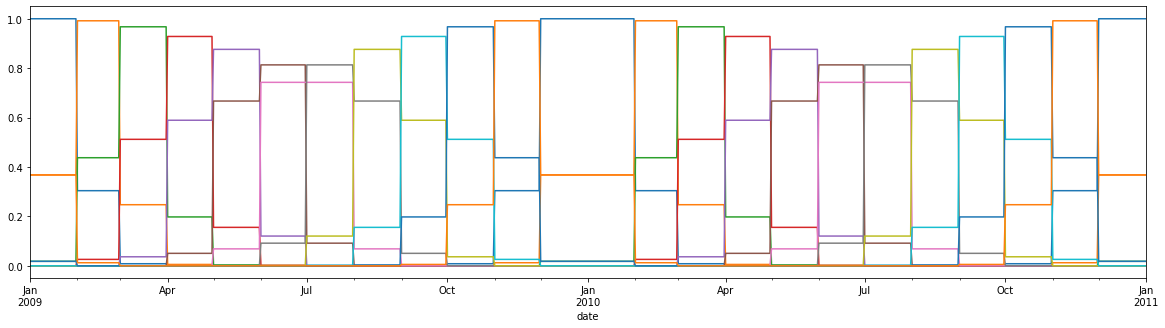

In [57]:
ex_df3.plot(subplots=True,figsize=(20,5),legend=False);
ex_df3.plot(figsize=(20,5),legend=False);

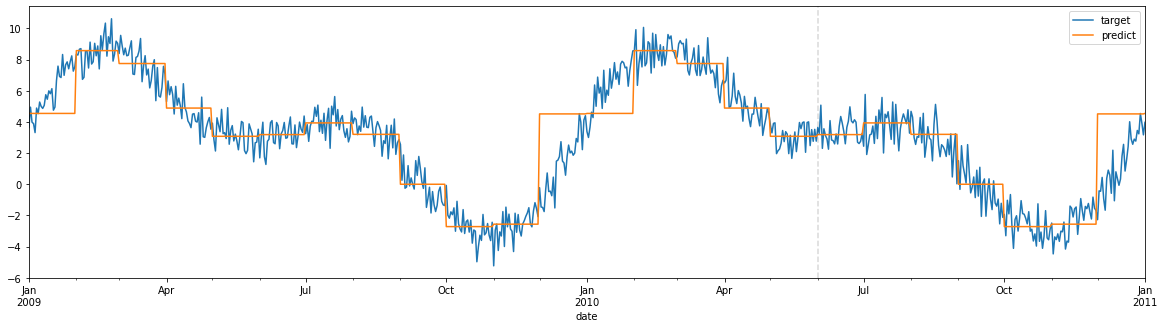

In [58]:
train_end= datetime(2010,6,1)

model= LinearRegression().fit(ex_df3.loc[:train_end], y.loc[:train_end])

y['predict']= model.predict(ex_df3)
y[['target', 'predict']].plot(figsize=(20,5))

plt.axvline(train_end, linestyle='--', color='k', alpha=0.15)

In [59]:
# chosing the week_sin and week_cos instant the month_sin and month_cos for as new feature

df_['week_sin']= sin_transform(53).fit_transform(df_['week'])
df_['week_cos']= cos_transform(53).fit_transform(df_['week'])
df_.head()

date  rainfall  Depth_to_Groundwater  Temperature  drainage_volume  \
0 2009-01-01  0.000000              0.000000    11.814286         0.000000   
1 2009-01-08  0.157143              0.023286    14.814286         0.233269   
2 2009-01-15  0.028571              0.039807     7.528571        -0.265455   
3 2009-01-22  0.585714             -0.013284     6.214286        -0.065264   
4 2009-01-29  0.000000             -0.012643     6.142857         0.120153   

   river_hydrometry  year  month  week  day  quarter  season    seas  \
0          0.000000  2009      1     1    1        1       1  Winter   
1         -0.102654  2009      1     2    8        1       1  Winter   
2          0.084192  2009      1     3   15        1       1  Winter   
3          0.083382  2009      1     4   22        1       1  Winter   
4          0.005698  2009      1     5   29        1       1  Winter   

   week_sin  week_cos  
0  0.118273  0.992981  
1  0.234886  0.972023  
2  0.348202   0.93742  
3  0.456629  0.889657  
4  0.558647  0.829406

In [60]:
# TimeSeries Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

def decomp(col):
    
    decop= seasonal_decompose(df_[col], period=52, model='additive', extrapolate_trend='freq')
    
    df_[f'{col}_trend']= decop.trend
    df_[f'{col}_seasonal']= decop.seasonal
    
    
    df_t= pd.DataFrame(index=range(len(decop.observed)))
    
    df_t['date']= df_['date']
    df_t['observed']= decop.observed
    df_t['trend']= decop.trend
    df_t['seasonal']= decop.seasonal
    df_t['resid']=decop.resid
    df_t= df_t[['date','observed','trend','seasonal','resid']].resample('M',on='date').mean().reset_index().ffill()
        
    fig, ax= plt.subplots(nrows=4, ncols=1, figsize=(20,10))
    fig.suptitle('Decomposition of {}'.format(col) , fontsize= 25)
    
    for i, col in enumerate(df_t.columns[1:]):
        sns.lineplot(df_t['date'], df_t[col], ax=ax[i], color='dodgerblue')
        ax[i].set_ylabel(col, fontsize=15)
#         df_t[['date'+ col]].resample('M',on='date').mean().reset_index().ffill()
       

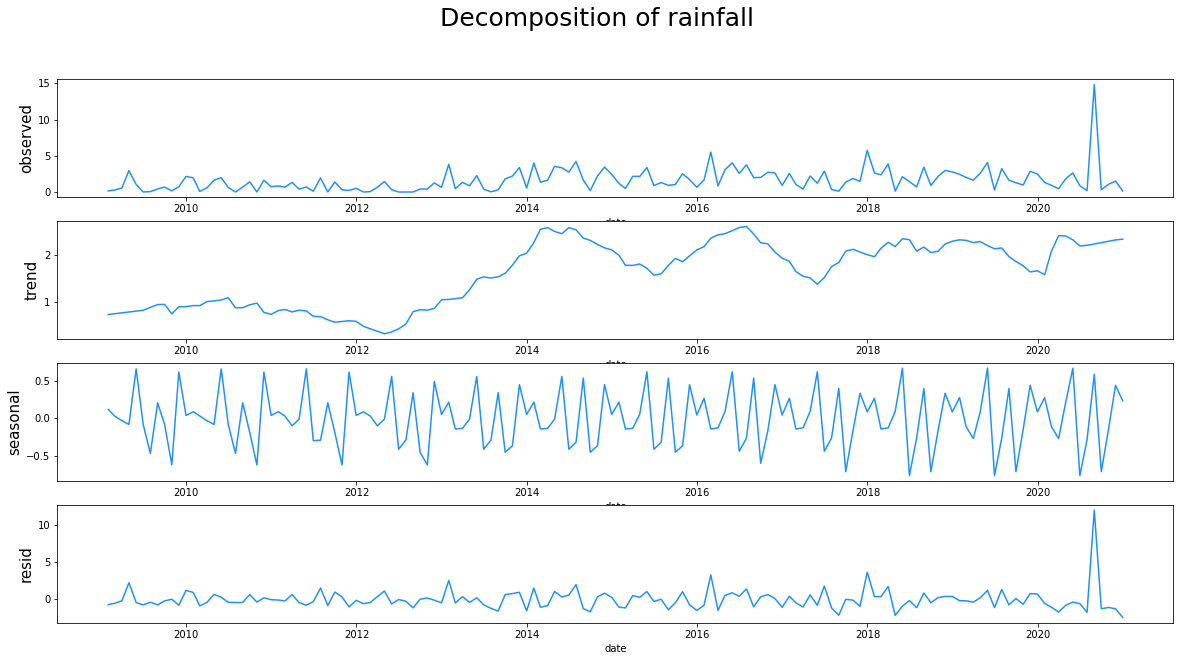

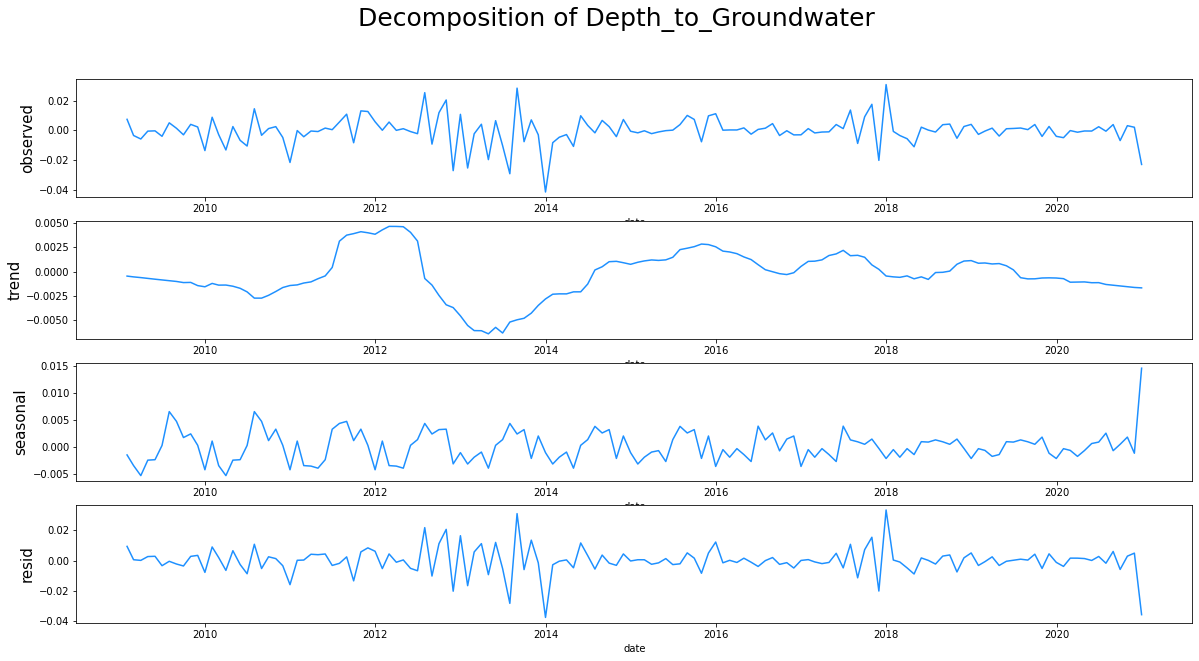

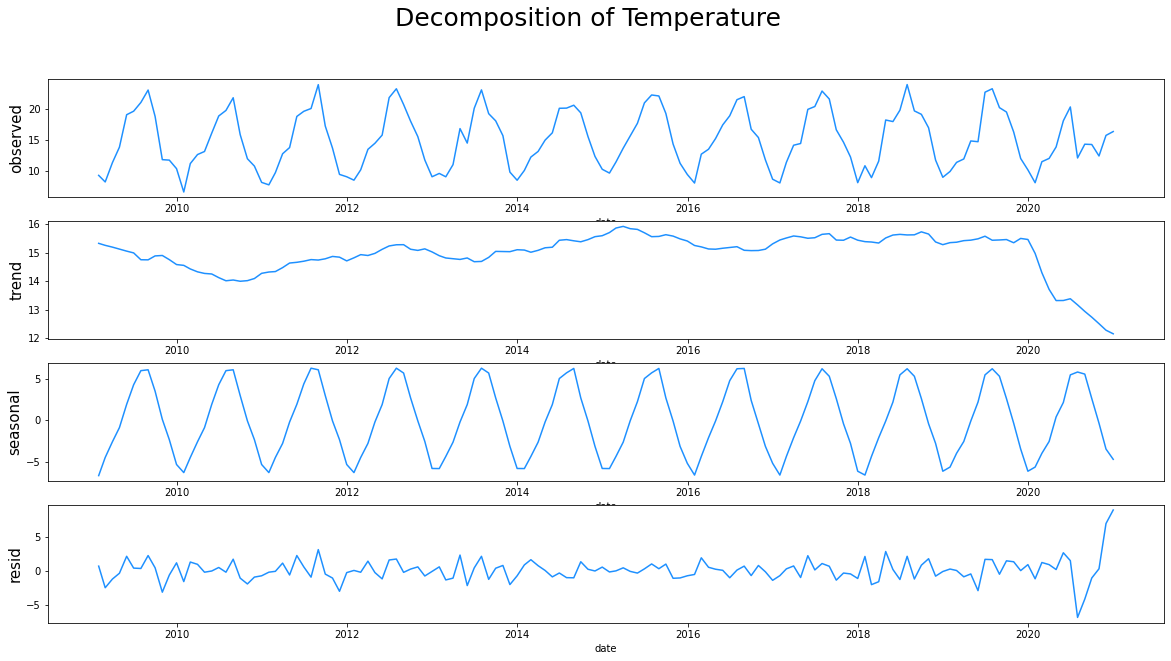

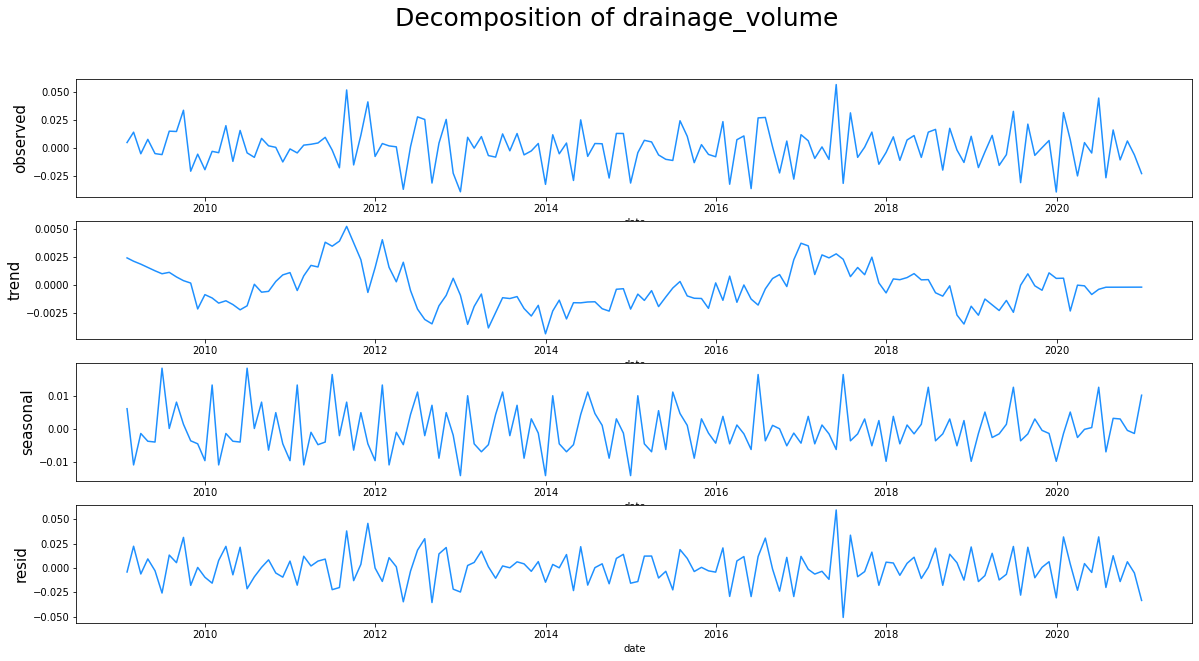

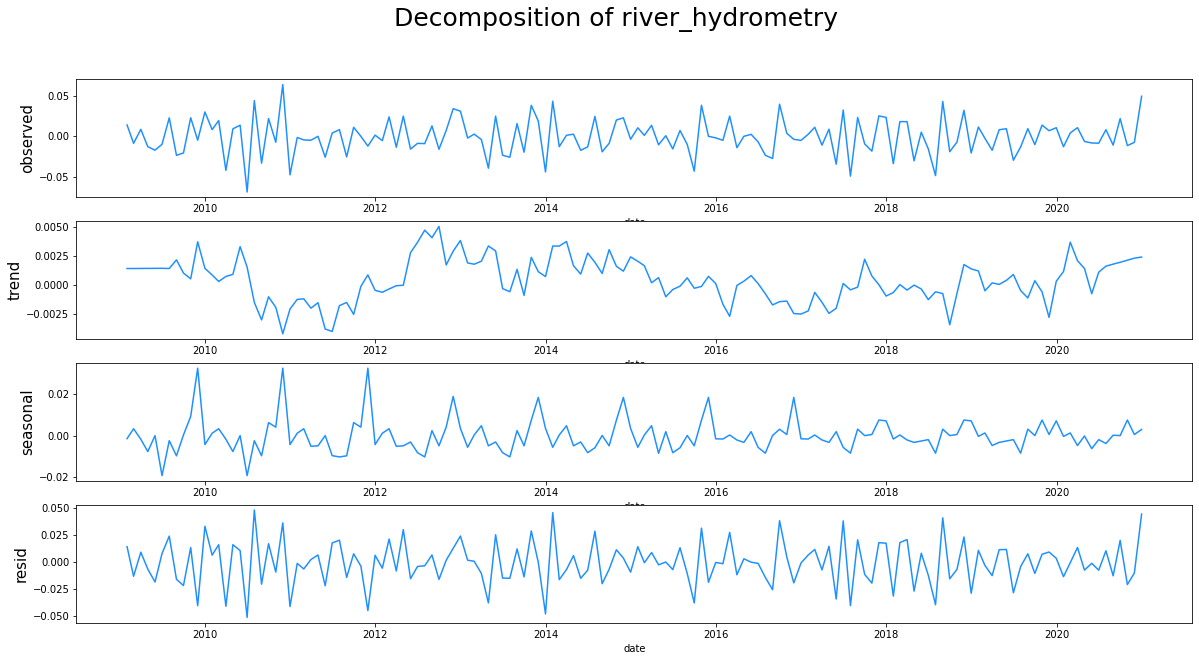

In [61]:
decomp('rainfall'),
decomp('Depth_to_Groundwater'),
decomp('Temperature'),
decomp('drainage_volume'),
decomp('river_hydrometry')

In [62]:
pd.set_option('display.max_columns', None)
df_.head()

date  rainfall  Depth_to_Groundwater  Temperature  drainage_volume  \
0 2009-01-01  0.000000              0.000000    11.814286         0.000000   
1 2009-01-08  0.157143              0.023286    14.814286         0.233269   
2 2009-01-15  0.028571              0.039807     7.528571        -0.265455   
3 2009-01-22  0.585714             -0.013284     6.214286        -0.065264   
4 2009-01-29  0.000000             -0.012643     6.142857         0.120153   

   river_hydrometry  year  month  week  day  quarter  season    seas  \
0          0.000000  2009      1     1    1        1       1  Winter   
1         -0.102654  2009      1     2    8        1       1  Winter   
2          0.084192  2009      1     3   15        1       1  Winter   
3          0.083382  2009      1     4   22        1       1  Winter   
4          0.005698  2009      1     5   29        1       1  Winter   

   week_sin  week_cos  rainfall_trend  rainfall_seasonal  \
0  0.118273  0.992981        0.724526           0.251366   
1  0.234886  0.972023        0.728719           0.010380   
2  0.348202   0.93742        0.732912           0.313320   
3  0.456629  0.889657        0.737105           0.695116   
4  0.558647  0.829406        0.741298          -0.667477   

   Depth_to_Groundwater_trend  Depth_to_Groundwater_seasonal  \
0                   -0.000420                      -0.011707   
1                   -0.000439                      -0.013767   
2                   -0.000457                       0.012423   
3                   -0.000476                       0.008405   
4                   -0.000494                      -0.002680   

   Temperature_trend  Temperature_seasonal  drainage_volume_trend  \
0          15.357287             -8.172584               0.002559   
1          15.341677             -2.700313               0.002493   
2          15.326066             -3.271672               0.002428   
3          15.310456             -9.422143               0.002362   
4          15.294846             -9.954274               0.002296   

   drainage_volume_seasonal  river_hydrometry_trend  river_hydrometry_seasonal  
0                 -0.022407                0.001395                  -0.011791  
1                  0.034879                0.001396                  -0.021381  
2                 -0.020933                0.001397                  -0.027265  
3                  0.018384                0.001398                   0.035857  
4                  0.020728                0.001399                   0.017335

In [63]:
# calculate each variable with a shift() (lag) to compare the correlationwith the other variables.
for col in df.columns[1:6]:
    df_[f'{col}_shift_p_2m']= df_[f'{col}_seasonal'].shift(-2*4)
    df_[f'{col}_shift_p_1m']= df_[f'{col}_seasonal'].shift(-1*4)
    df_[f'{col}_shift_1m']= df_[f'{col}_seasonal'].shift(1*4)
    df_[f'{col}_shift_2m']= df_[f'{col}_seasonal'].shift(2*4)
    df_[f'{col}_shift_3m']= df_[f'{col}_seasonal'].shift(3*4)    

In [64]:
df_.head()

date  rainfall  Depth_to_Groundwater  Temperature  drainage_volume  \
0 2009-01-01  0.000000              0.000000    11.814286         0.000000   
1 2009-01-08  0.157143              0.023286    14.814286         0.233269   
2 2009-01-15  0.028571              0.039807     7.528571        -0.265455   
3 2009-01-22  0.585714             -0.013284     6.214286        -0.065264   
4 2009-01-29  0.000000             -0.012643     6.142857         0.120153   

   river_hydrometry  year  month  week  day  quarter  season    seas  \
0          0.000000  2009      1     1    1        1       1  Winter   
1         -0.102654  2009      1     2    8        1       1  Winter   
2          0.084192  2009      1     3   15        1       1  Winter   
3          0.083382  2009      1     4   22        1       1  Winter   
4          0.005698  2009      1     5   29        1       1  Winter   

   week_sin  week_cos  rainfall_trend  rainfall_seasonal  \
0  0.118273  0.992981        0.724526           0.251366   
1  0.234886  0.972023        0.728719           0.010380   
2  0.348202   0.93742        0.732912           0.313320   
3  0.456629  0.889657        0.737105           0.695116   
4  0.558647  0.829406        0.741298          -0.667477   

   Depth_to_Groundwater_trend  Depth_to_Groundwater_seasonal  \
0                   -0.000420                      -0.011707   
1                   -0.000439                      -0.013767   
2                   -0.000457                       0.012423   
3                   -0.000476                       0.008405   
4                   -0.000494                      -0.002680   

   Temperature_trend  Temperature_seasonal  drainage_volume_trend  \
0          15.357287             -8.172584               0.002559   
1          15.341677             -2.700313               0.002493   
2          15.326066             -3.271672               0.002428   
3          15.310456             -9.422143               0.002362   
4          15.294846             -9.954274               0.002296   

   drainage_volume_seasonal  river_hydrometry_trend  \
0                 -0.022407                0.001395   
1                  0.034879                0.001396   
2                 -0.020933                0.001397   
3                  0.018384                0.001398   
4                  0.020728                0.001399   

   river_hydrometry_seasonal  rainfall_shift_p_2m  rainfall_shift_p_1m  \
0                  -0.011791            -0.551331            -0.667477   
1                  -0.021381             0.039402             0.727119   
2                  -0.027265             0.444021             0.311147   
3                   0.035857            -0.319985            -0.365782   
4                   0.017335            -0.290687            -0.551331   

   rainfall_shift_1m  rainfall_shift_2m  rainfall_shift_3m  \
0                NaN                NaN                NaN   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3                NaN                NaN                NaN   
4           0.251366                NaN                NaN   

   Depth_to_Groundwater_shift_p_2m  Depth_to_Groundwater_shift_p_1m  \
0                        -0.005795                        -0.002680   
1                        -0.013890                        -0.020087   
2                         0.005415                         0.000386   
3                        -0.002907                         0.011759   
4                        -0.009755                        -0.005795   

   Depth_to_Groundwater_shift_1m  Depth_to_Groundwater_shift_2m  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                      -0.011707  

<AxesSubplot:>

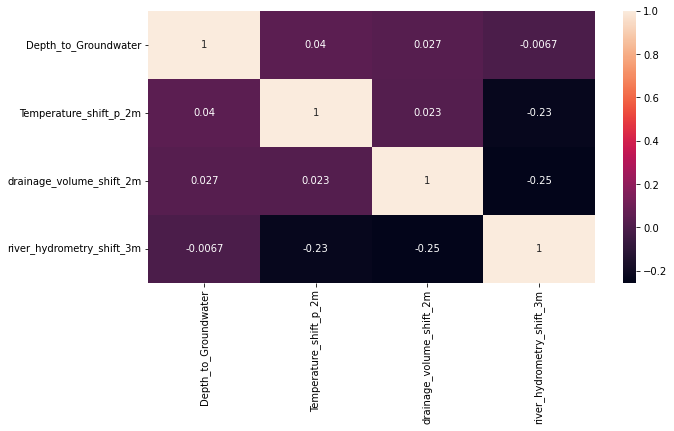

In [65]:
col=['Depth_to_Groundwater','Temperature_shift_p_2m',
    'drainage_volume_shift_2m','river_hydrometry_shift_3m']

a= df_[col].corr()
sns.heatmap(a, annot=True)

<AxesSubplot:>

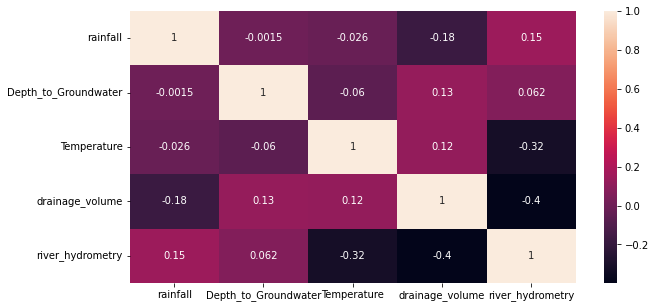

In [66]:
co=['rainfall','Depth_to_Groundwater','Temperature','drainage_volume','river_hydrometry']
a= df_[co].corr()
sns.heatmap(a, annot=True)

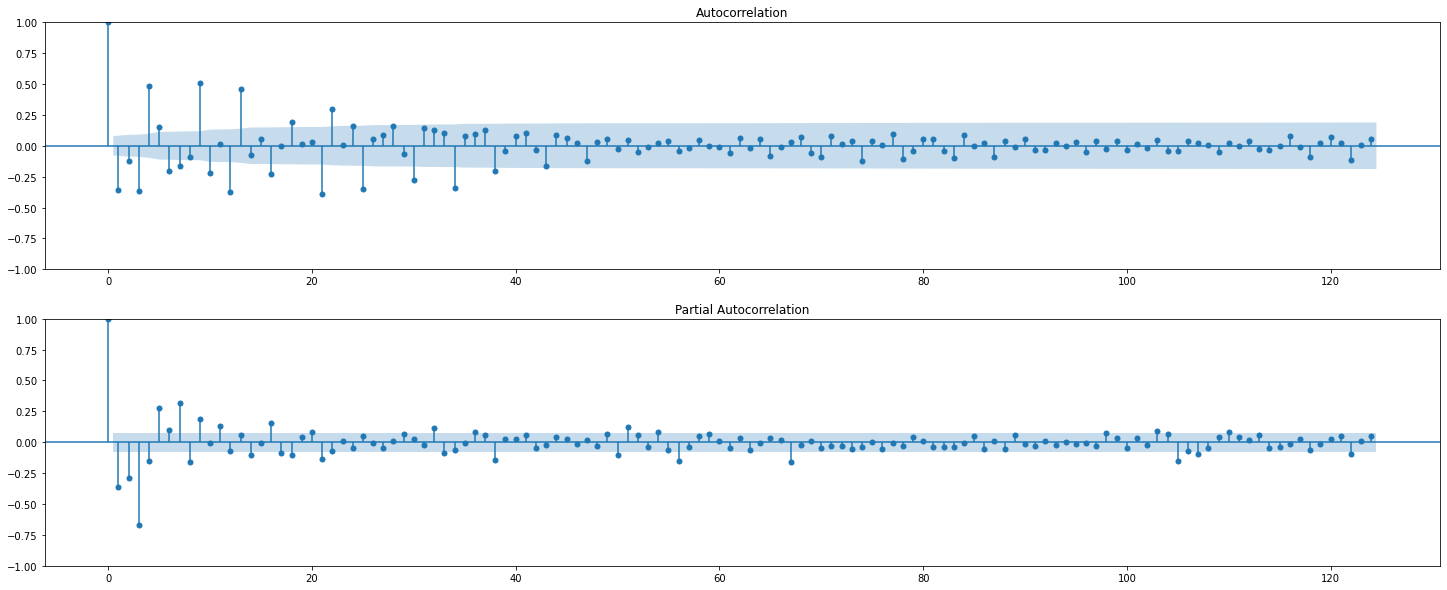

In [67]:
# ploting Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax= plt.subplots(nrows=2, ncols=1, figsize=(25,10))

plot_acf(df_['Depth_to_Groundwater'],lags=len(df)/5, ax=ax[0])
plot_pacf(df_['Depth_to_Groundwater'], lags=len(df)/5, ax=ax[1])

plt.show()

## Modeling

### 1. Arima model

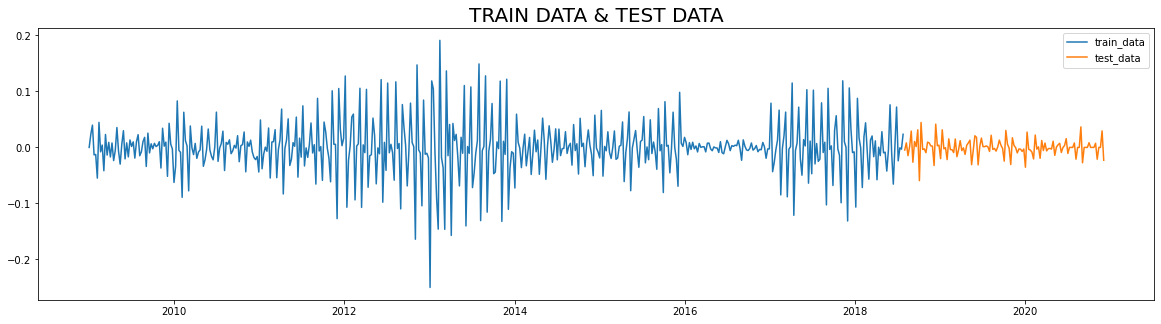

In [68]:
# fiting the model
df_1= df_[['date','Depth_to_Groundwater']]
df_1.set_index('date', inplace=True)


train_end= datetime(2018,7,26)
test_end= datetime(2020,12,3)

train_data= df_1[:train_end]
test_data= df_1[train_end+timedelta(1):test_end]

model= ARIMA(train_data, order=(4,1,4))
model_fit= model.fit()

def plot_(train, test):
    
    plt.subplots(nrows=1, ncols=1, figsize=(20,5))
    plt.plot(train_data, label='train_data')
    plt.plot(test_data, label='test_data')
    plt.title('TRAIN DATA & TEST DATA', fontsize=20)
    plt.legend()

plot_(train_data, test_data)

In [69]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Depth_to_Groundwater   No. Observations:                  500
Model:                   ARIMA(4, 1, 4)   Log Likelihood                1045.508
Date:                  Sat, 07 Jan 2023   AIC                          -2073.016
Time:                          03:48:28   BIC                          -2035.103
Sample:                      01-01-2009   HQIC                         -2058.138
                           - 07-26-2018                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5716      0.034    -46.560      0.000      -1.638      -1.505
ar.L2         -1.2610      0.048    -26.332      0.000      -1.355      -1.167
ar.L3         -1.2922      0.049    -26.428      0.000      -1.388      -1.196
ar.L4         -0.7463      0.026    -28.446      0.000      -0.798      -0.695
ma.L1         -0.0693      0.040     -1.745      0.081      -0.147       0.009
ma.L2         -0.8179      0.049    -16.797      0.000      -0.913      -0.722
ma.L3          0.0735      0.054      1.370      0.171      -0.032       0.179
ma.L4          0.1379      0.052      2.630      0.009       0.035       0.241
sigma2         0.0009   2.47e-05     35.510      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              2722.91
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.60
Prob(H) (two-sided):                  0.14   Kurtosis:                        14.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
# predict
prediction= model_fit.predict(test_data.index[0],test_data.index[-1])

In [71]:
df1= pd.DataFrame(prediction)
df2= pd.DataFrame(test_data)
df3= df2.join(df1)
df3.rename(columns={'Depth_to_Groundwater':'test'}, inplace= True)
df3['res']= df3.test -  df3.predicted_mean

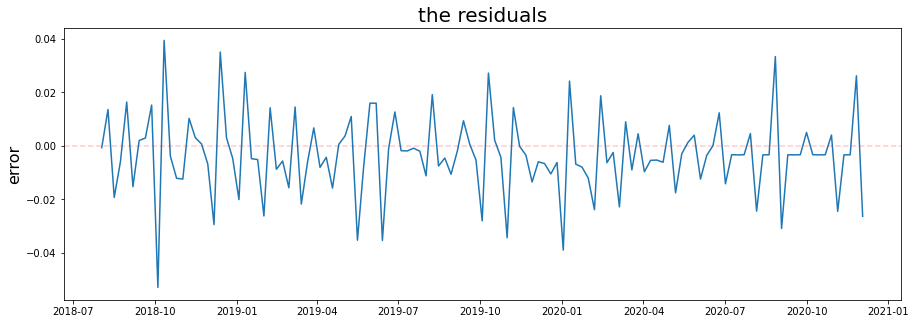

In [72]:
#ploting the residuals (test data - prediction)
def plot(df):
    plt.figure(figsize=(15,5))
    plt.plot(df)
    plt.title("the residuals", fontsize=20)
    plt.ylabel('error', fontsize= 16)
    plt.axhline(0, color= 'r', linestyle= '--', alpha= 0.2)
#     plt.xlim(datetime(2019,7),datetime(2021,1))
#     for year in range(2018,2021):
#         plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='--', alpha=0.2)

plot(df3['res'])

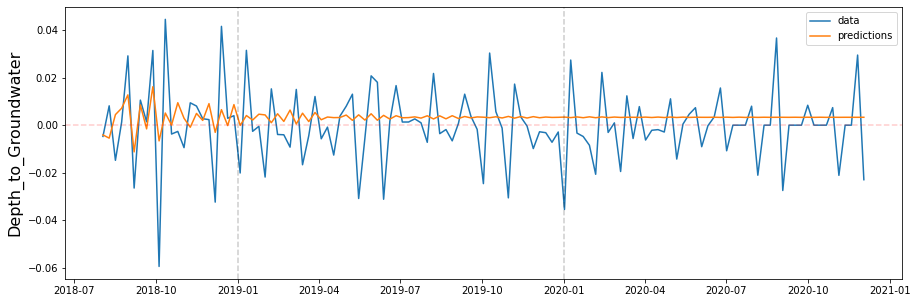

In [73]:
# ploting the fitline
# (as we can see the fitline cant fit the data so we gonna use rolling foracast method)
def plot(df,df1):
    plt.figure(figsize=(15,5))
    plt.plot(df)
    plt.plot(df1)
    plt.legend(('data', 'predictions'), fontsize=10)
    plt.title("", fontsize=20)
    plt.ylabel('Depth_to_Groundwater', fontsize= 16)
    plt.axhline(0, color= 'r', linestyle= '--', alpha= 0.2)
    for year in range(2019,2021):
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
        
plot(df3['test'], df3['predicted_mean'])

In [74]:
# print('mean absolute percent error', round(np.mean(abs(df3['res']/df3['test'])),4))

In [75]:
print('root mean squared error', np.sqrt(np.mean(df3['res']**2)))

root mean squared error 0.0154228726799131


In [76]:
# rolling forecast
prediction= pd.Series()
for end_date in test_data.index:
    train_data= df_1[:end_date - timedelta(days=1)]
    model= ARIMA(train_data, order=(4,1,4))
    model_fit= model.fit()
    predict= model_fit.predict(test_data.index[0],end_date)
    prediction.loc[end_date]= predict.loc[end_date]

In [77]:
res= df3['test']-prediction

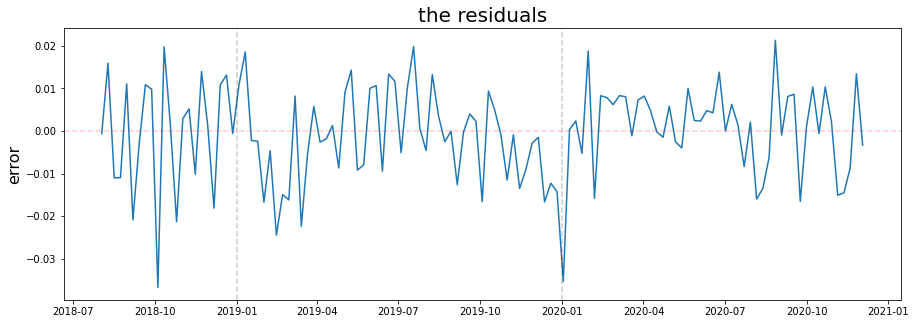

In [78]:
#ploting the residuals (test data - prediction)
def plot(df):
    plt.figure(figsize=(15,5))
    plt.plot(df)
    plt.title("the residuals", fontsize=20)
    plt.ylabel('error', fontsize= 16)
    plt.axhline(0, color= 'r', linestyle= '--', alpha= 0.2)
#     plt.xlim(datetime(2019,7),datetime(2021,1))
    for year in range(2019,2021):
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

plot(res)

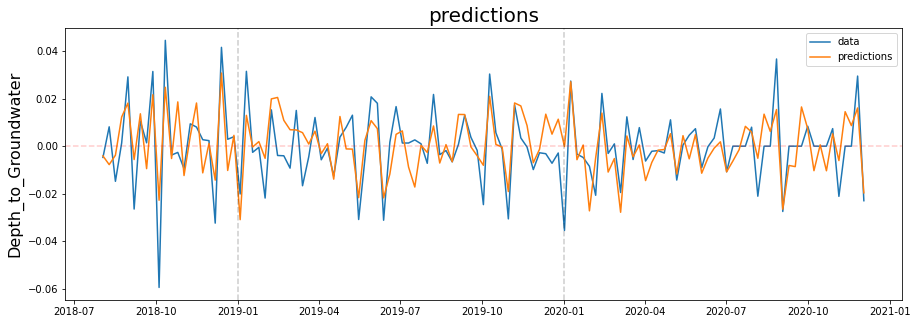

In [79]:
#ploting the fit line
def plot(df,df1):
    plt.figure(figsize=(15,5))
    plt.plot(df)
    plt.plot(df1)
    plt.legend(('data', 'predictions'), fontsize=10)
    plt.title("predictions", fontsize=20)
    plt.ylabel('Depth_to_Groundwater', fontsize= 16)
    plt.axhline(0, color= 'r', linestyle= '--', alpha= 0.2)
    for year in range(2019,2021):
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
        
plot(df3['test'], prediction)

In [80]:
# print('mean absolute percent error', round(np.mean(abs(res/df3['test'])),4))

In [81]:
print('root mean squared error', np.sqrt(np.mean(res**2)))

root mean squared error 0.011218023344786669


In [82]:
#forcast 2 month period in future
forcast= model_fit.predict(datetime(2020,12,3),datetime(2021,2,3))

In [83]:
new=forcast.to_frame()
new= new.rename(columns={'predicted_mean':'Depth_to_Groundwater'})
c_i= pd.concat([df_1,new])

In [84]:
# the Confidence Intervals for our period
import scipy.stats as st
ci=st.norm.interval(alpha=0.95, 
                 loc=np.mean(c_i),
                 scale=st.sem(c_i))

c= ci[0]-ci[1]
range_= c_i.tail(len(forcast))
range_

upper=range_+c
lower=range_-c
lower=lower.iloc[:,0] 
upper= upper.iloc[:,0]

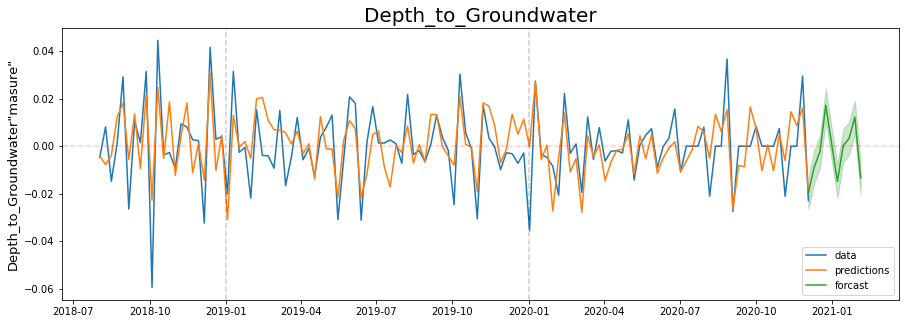

In [85]:
def plot(df,df1,df2):
    plt.figure(figsize=(15,5))
    plt.plot(df)
    plt.plot(df1)
    plt.plot(df2)
    plt.fill_between(forcast.index,lower,upper,color='g', alpha=0.2, label='Confidence Intervals')
    plt.legend(('data', 'predictions','forcast'), fontsize=10)
    plt.title("Depth_to_Groundwater", fontsize=20)
    plt.ylabel('Depth_to_Groundwater"masure"', fontsize= 13)
    plt.axhline(0, color= 'r', linestyle= '--', alpha= 0.2)
    for year in range(2019,2021):
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
    
        
plot(df3['test'], prediction, forcast)

In [86]:
# reverse the differentiation and log transform
new=forcast.to_frame()
new= new.rename(columns={'predicted_mean':'Depth_to_Groundwater'})
df_2= pd.concat([df_1,new])

df_2.iloc[0]= np.log(abs(df.Depth_to_Groundwater.iloc[0]))
org_df= np.exp(df_2.cumsum())
org_df= -abs(org_df)

In [87]:
#our forecast data
forcast_values= org_df.iloc[-5:].style.background_gradient()
forcast_values

In [88]:
# ci= 1.960*np.std(org_df)/np.mean(org_df)

ci=st.norm.interval(alpha=0.95, 
                 loc=np.mean(org_df),
                 scale=st.sem(org_df))

c= ci[0]-ci[1]
range_= org_df.tail(5)

upper= range_+c
lower= range_-c
lower=lower.iloc[:,0] 
upper= upper.iloc[:,0]

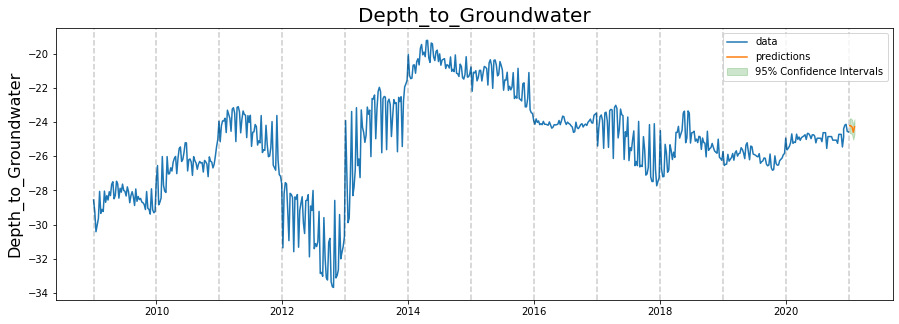

In [89]:
#ploting the original data with our forecast
def plot(df,df1):
    plt.figure(figsize=(15,5))
    plt.plot(df)
    plt.plot(df1)
    plt.fill_between(range_.index,lower,upper,color='g', alpha=0.2, label='Confidence Intervals')
    plt.legend(('data', 'predictions','95% Confidence Intervals'), fontsize=10)
    plt.title("Depth_to_Groundwater", fontsize=20)
    plt.ylabel('Depth_to_Groundwater', fontsize= 16)
    for year in range(2009,2022):
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
#     plt.xlim(datetime(2018,1,1), datetime(2021,1,7))
        
plot(org_df['Depth_to_Groundwater'][:-5], org_df['Depth_to_Groundwater'][-5:])

In [90]:
# def plot(df,df1):
#     plt.figure(figsize=(15,5))
#     plt.plot(df)
#     plt.plot(df1)
#     plt.fill_between(range_.index,lower,upper,color='g', alpha=0.2)
#     plt.legend(('data', 'predictions','95% Confidence Intervals'), fontsize=10)
#     plt.title("Depth_to_Groundwater", fontsize=20)
#     plt.ylabel('Depth_to_Groundwater', fontsize= 16)
#     plt.xlim(datetime(2020,1,1), datetime(2021,1,7))
        
# plot(org_df['Depth_to_Groundwater'][:-5], org_df['Depth_to_Groundwater'][-5:])

In [91]:
# take the diffrence and the log tran
# df= np.log(abs(df2.Depth_to_Groundwater_P24)).diff()


# df.iat[0]= np.log(abs(df2.Depth_to_Groundwater_P24.iat[0]))
# res = np.exp(df_diff.cumsum())
# -abs(res)

### 2.Auto Arima

In [92]:
from pmdarima.arima import auto_arima as am

In [93]:
# fiting the model
model_fit1= am(train_data, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_fit1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1467.370, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1726.573, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2035.620, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1469.370, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2334.707, Time=1.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-2340.101, Time=0.74 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2344.716, Time=0.93 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-2370.327, Time=0.77 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-2267.136, Time=0.65 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-2408.111, Time=0.82 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-2611.821, Time=0.91 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   :

In [94]:
# predict
prediction, confint = model_fit1.predict(n_periods=len(test_data), return_conf_int=True)

In [95]:
res= test_data['Depth_to_Groundwater'].to_numpy() - prediction

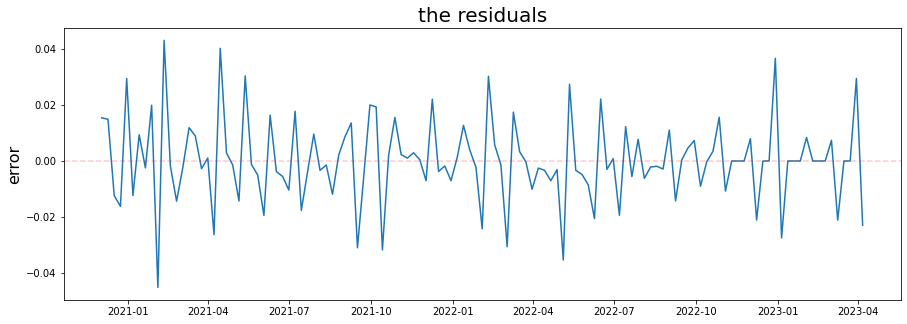

In [96]:
def res_(df):
    plt.figure(figsize=(15,5))
    plt.plot(df)
    plt.title("the residuals", fontsize=20)
    plt.ylabel('error', fontsize= 16)
    plt.axhline(0, color= 'r', linestyle= '--', alpha= 0.2)

res_(res)

In [97]:
pred= prediction.to_frame().set_index(test_data.index)
ci= pd.DataFrame(confint)

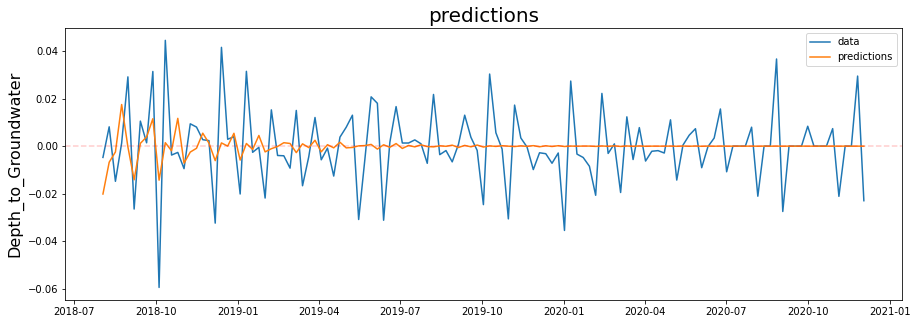

In [98]:
def plot(df,df1):
    plt.figure(figsize=(15,5))
    plt.plot(df)
    plt.plot(df1)
    plt.legend(('data', 'predictions'), fontsize=10)
    plt.title("predictions", fontsize=20)
    plt.ylabel('Depth_to_Groundwater', fontsize= 16)
    plt.axhline(0, color= 'r', linestyle= '--', alpha= 0.2)
#     for year in range(2019,2021):
#         plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
        
plot(test_data, pred)

In [99]:
print('root mean squared error', np.sqrt(np.mean(res**2)))

root mean squared error 0.015101787182344069


In [100]:
# rolling forecast
prediction= pd.Series()
for end_date in test_data.index:
    train_data= df_1[:end_date - timedelta(days=1)]
    model= ARIMA(train_data, order= model.order)
    model_fit= model.fit()
    predict= model_fit.predict(test_data.index[0],end_date)
    prediction.loc[end_date]= predict.loc[end_date]

In [101]:
res= test_data['Depth_to_Groundwater'].to_numpy() - prediction

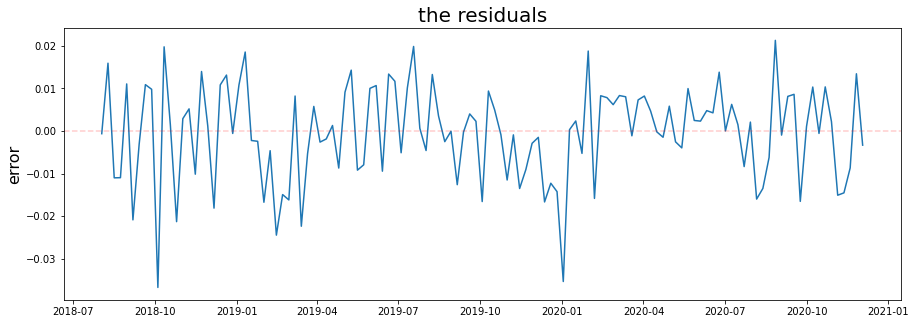

In [102]:
# the residuals after rolling forecast
def res_(df):
    plt.figure(figsize=(15,5))
    plt.plot(df)
    plt.title("the residuals", fontsize=20)
    plt.ylabel('error', fontsize= 16)
    plt.axhline(0, color= 'r', linestyle= '--', alpha= 0.2)

res_(res)

In [103]:
pred= prediction.to_frame().set_index(test_data.index)

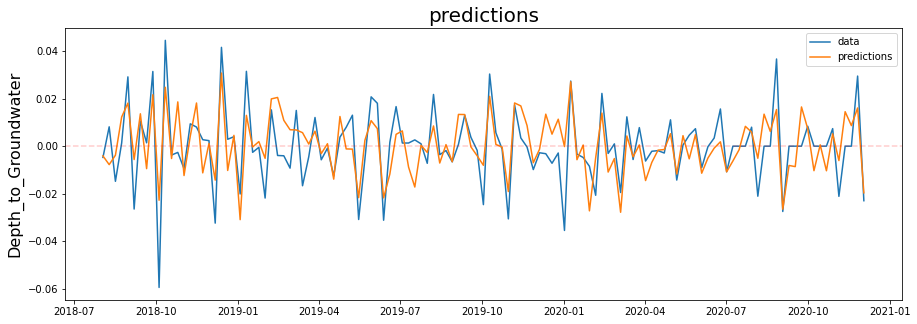

In [104]:
def plot(df,df1):
    plt.figure(figsize=(15,5))
    plt.plot(df)
    plt.plot(df1)
    plt.legend(('data', 'predictions'), fontsize=10)
    plt.title("predictions", fontsize=20)
    plt.ylabel('Depth_to_Groundwater', fontsize= 16)
    plt.axhline(0, color= 'r', linestyle= '--', alpha= 0.2)
#     for year in range(2019,2021):
#         plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
        
plot(test_data, pred)

In [105]:
print('root mean squared error', np.sqrt(np.mean(res**2)))

root mean squared error 0.011218023344786669


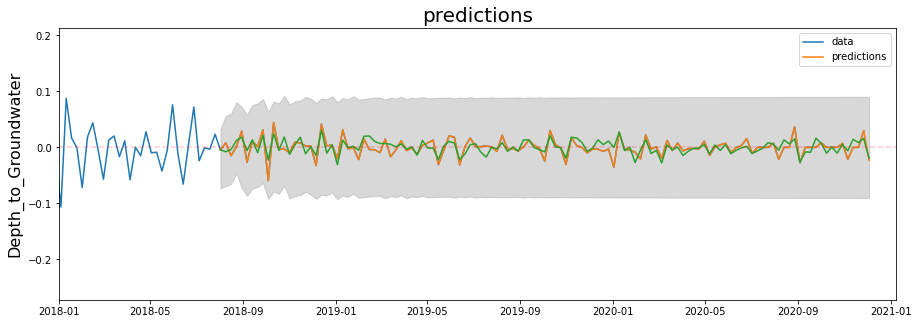

In [106]:
# ploting the fit line
def plot(df,df1,df2):
    plt.figure(figsize=(15,5))
    plt.plot(df)
    plt.plot(df1)
    plt.plot(df2)
    plt.legend(('data', 'predictions'), fontsize=10)
    plt.title("predictions", fontsize=20)
    plt.ylabel('Depth_to_Groundwater', fontsize= 16)
    plt.axhline(0, color= 'r', linestyle= '--', alpha= 0.2)
#     for year in range(2019,2021):
#         plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
    plt.xlim(datetime(2018,1,1), datetime(2021,1,7))
    plt.fill_between(df2.index,ci[0],ci[1],color='grey',alpha=.3)
        
plot(train_data, test_data, pred)

In [107]:
# forecasting 11 periods in future
forcast, con = model_fit1.predict(n_periods=11, return_conf_int=True)

In [108]:
forcast= forcast.to_frame()
ci1= pd.DataFrame(con)

In [109]:
# forcast=forcast[-5:].values

In [110]:
# from dateutil import rrule, parser

# date1 = '2020-12-10'
# date2 = '2021-01-07'

# dates = list(rrule.rrule(rrule.WEEKLY,
#                          dtstart=parser.parse(date1),
#                          until=parser.parse(date2)))

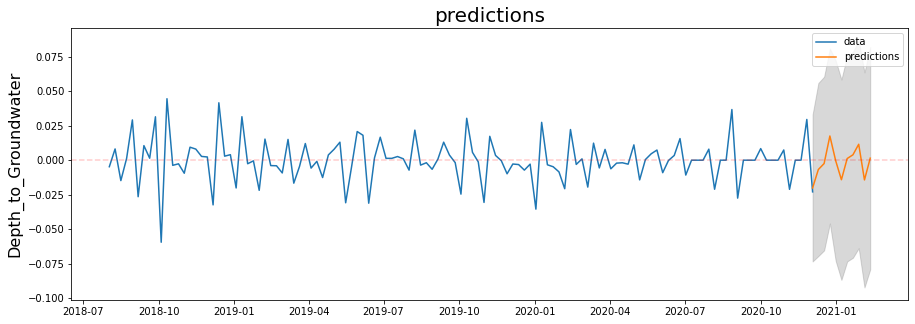

In [111]:
# plot the forecast
def plot(df,df1):
    plt.figure(figsize=(15,5))
    plt.plot(df)
    plt.plot(df1)
    plt.legend(('data', 'predictions'), fontsize=10)
    plt.title("predictions", fontsize=20)
    plt.ylabel('Depth_to_Groundwater', fontsize= 16)
    plt.axhline(0, color= 'r', linestyle= '--', alpha= 0.2)
#     for year in range(2019,2021):
#         plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
#     plt.xlim(datetime(2018,1,1), datetime(2021,1,7))
    plt.fill_between(df1.index,ci1[0],ci1[1],color='gray',alpha=.3)
        
plot(test_data, forcast)

In [112]:
# reverse the differentiation and log transform
forcast= forcast[-5:]
new= forcast.rename(columns={0:'Depth_to_Groundwater'})
df_2= pd.concat([df_1,new])

df_2.iloc[0]= np.log(abs(df.Depth_to_Groundwater.iloc[0]))
org_df= np.exp(df_2.cumsum())
org_df= -abs(org_df)

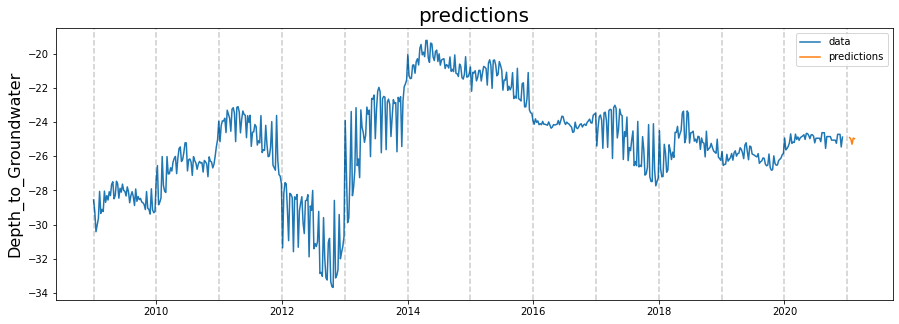

In [113]:
def plot(df,df1):
    plt.figure(figsize=(15,5))
    plt.plot(df)
    plt.plot(df1)
    plt.legend(('data', 'predictions'), fontsize=10)
    plt.title("predictions", fontsize=20)
    plt.ylabel('Depth_to_Groundwater', fontsize= 16)
#     plt.axhline(0, color= 'r', linestyle= '--', alpha= 0.2)
    for year in range(2009,2022):
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
#     plt.xlim(datetime(2018,1,1), datetime(2021,1,7))
#     plt.fill_between(forcast.index,ci[0],ci[1],color='grey',alpha=.3)
        
plot(org_df['Depth_to_Groundwater'][:-5], org_df['Depth_to_Groundwater'][-5:])

In [114]:
forcast_values1= org_df.iloc[-5:].style.background_gradient()
forcast_values1

In [115]:
# plot_pacf(res**2)
# plt.show()

In [116]:
# train_end= datetime(2018,7,26)
# test_end= datetime(2020,12,3)

# train_data= df_1[:train_end]
# test_data= df_1[train_end+timedelta(1):test_end]

In [117]:
# df_1= df_[['date','Depth_to_Groundwater']]
# df_1.set_index('date', inplace=True)


### 3.prophet 

In [118]:
pro_df= df[['date','Depth_to_Groundwater']]
pro_df.columns= ['ds','y']

ptrain_end= pro_df.loc[pro_df['ds'] == '2018-07-26'].index[0]+1
ptest_end= pro_df.loc[pro_df['ds'] == '2020-12-03'].index[0]+1

ptrain_data= pro_df[:ptrain_end]
ptest_data= pro_df[ptrain_end:ptest_end]

In [119]:
#fit the model
from prophet import Prophet

# model1= Prophet(growth='linear',
#                 seasonality_mode='additive',
#                 changepoint_prior_scale=10,
#                 seasonality_prior_scale=20,
#                 holidays_prior_scale=20,
#                 daily_seasonality=False,
#                 weekly_seasonality=False,
#                 yearly_seasonality=False,
#                 ).add_seasonality(
#                      name='monthly',
#                      period=30.5,
#                      fourier_order=55
#                 ).add_seasonality(
#                      name='daily',
#                      period=1,
#                      fourier_order=15
#                 ).add_seasonality(
#                      name='weekly',
#                      period=7,
#                      fourier_order=20
#                 ).add_seasonality(
#                      name='yearly',
#                      period=365.25,
#                      fourier_order=20
#                 ).add_seasonality(
#                      name='quarterly',
#                      period=365.25/4,
#                      fourier_order=20,
#                      prior_scale= 15)

model1= Prophet(growth='linear')
model1.fit(ptrain_data);

03:51:26 - cmdstanpy - INFO - Chain [1] start processing
03:51:27 - cmdstanpy - INFO - Chain [1] done processing


In [120]:
#predict
prediction= model1.predict(ptest_data)

In [121]:
future= model1.make_future_dataframe(freq='w',periods=150)

In [122]:
forcast= model1.predict(future)

In [123]:
forcast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2009-01-01 -29.639567  -31.346954  -28.490917   -29.639567   -29.639567   
1   2009-01-08 -29.595556  -31.350300  -28.444312   -29.595556   -29.595556   
2   2009-01-15 -29.551545  -31.261907  -28.412339   -29.551545   -29.551545   
3   2009-01-22 -29.507534  -31.202215  -28.309539   -29.507534   -29.507534   
4   2009-01-29 -29.463522  -31.116442  -28.198041   -29.463522   -29.463522   
..         ...        ...         ...         ...          ...          ...   
645 2021-05-09 -29.439348  -37.620601  -20.254178   -37.962700   -21.027425   
646 2021-05-16 -29.461834  -37.410520  -20.137803   -38.086051   -20.924074   
647 2021-05-23 -29.484321  -37.461824  -19.941083   -38.226616   -20.821069   
648 2021-05-30 -29.506807  -37.889516  -19.792229   -38.428296   -20.735776   
649 2021-06-06 -29.529294  -38.074046  -19.820945   -38.549841   -20.612362   

     additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0         -0.254894             -0.254894             -0.254894 -0.254894   
1         -0.275219             -0.275219             -0.275219 -0.275219   
2         -0.283062             -0.283062             -0.283062 -0.283062   
3         -0.224776             -0.224776             -0.224776 -0.224776   
4         -0.140605             -0.140605             -0.140605 -0.140605   
..              ...                   ...                   ...       ...   
645        0.783513              0.783513              0.783513  0.783513   
646        0.860074              0.860074              0.860074  0.860074   
647        0.847591              0.847591              0.847591  0.847591   
648        0.764860              0.764860              0.764860  0.764860   
649        0.709309              0.709309              0.709309  0.709309   

     yearly_lower  yearly_upper  multiplicative_terms  \
0       -0.254894     -0.254894                   0.0   
1       -0.275219     -0.275219                   0.0   
2       -0.283062     -0.283062                   0.0   
3       -0.224776     -0.224776                   0.0   
4       -0.140605     -0.140605                   0.0   
..            ...           ...                   ...   
645      0.783513      0.783513                   0.0   
646      0.860074      0.860074                   0.0   
647      0.847591      0.847591                   0.0   
648      0.764860      0.764860                   0.0   
649      0.709309      0.709309                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                           0.0                         0.0 -29.894461  
1                           0.0                         0.0 -29.870775  
2                           0.0                         0.0 -29.834607  
3                           0.0                         0.0 -29.732309  
4                           0.0                         0.0 -29.604127  
..                          ...                         ...        ...  
645                         0.0                         0.0 -28.655835  
646                         0.0                         0.0 -28.601761  
647                         0.0                         0.0 -28.636730  
648                         0.0                         0.0 -28.741948  
649                         0.0                         0.0 -28.819985  

[650 rows x 16 columns]

In [124]:
res= ptest_data['y'].to_numpy() - prediction['yhat']

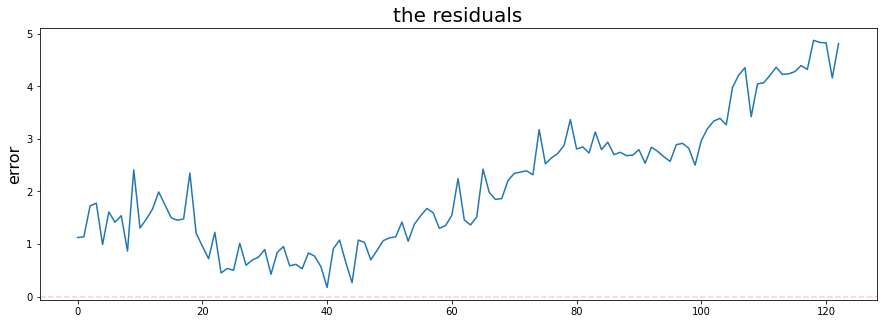

In [125]:
#plot the residual
def res_(df):
    plt.figure(figsize=(15,5))
    plt.plot(df)
    plt.title("the residuals", fontsize=20)
    plt.ylabel('error', fontsize= 16)
    plt.axhline(0, color= 'r', linestyle= '--', alpha= 0.2)

res_(res)

Text(0.5, 33.0, 'Date')

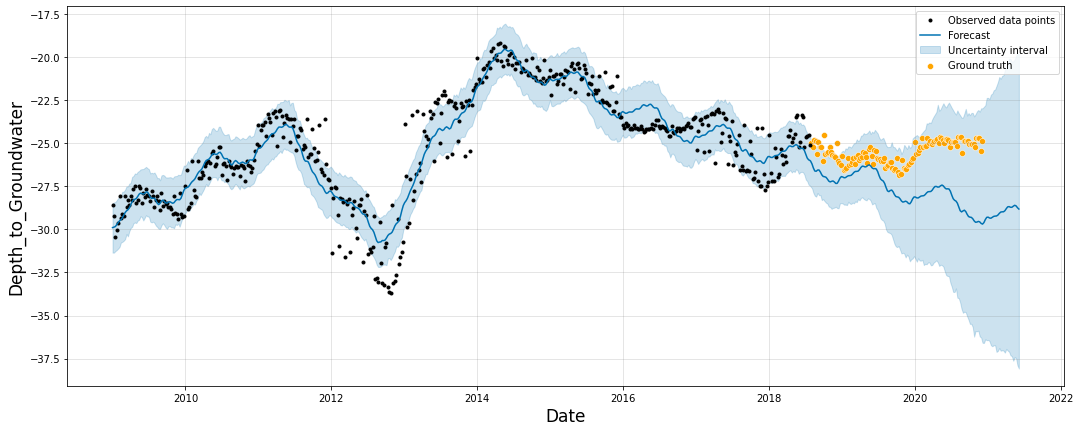

In [126]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model1.plot(forcast, ax=ax)
sns.scatterplot(x=ptest_data['ds'], y=ptest_data['y'],ax=ax, color='orange', label='Ground truth')
plt.ylabel('Depth_to_Groundwater', fontsize=17)
plt.xlabel('Date', fontsize=17)
# plt.axhline(0, color= 'r', linestyle= '--', alpha= 0.2);

In [127]:
print('root mean squared error', np.sqrt(np.mean(res**2)))

root mean squared error 2.450746705015636
